In [1]:
import glob
import pandas as pd
import numpy as np
import vcf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
#import pyranges as pr
pd.set_option('display.max_rows', 350)
pd.set_option('display.max_columns', 50)

In [9]:
##getting again the relevant ids
confounder=pd.read_csv("../Clinical_Data/AETIO_DIGPD_clinical_final.csv")
con_ids=confounder["AETID"].tolist()
#
vcf_reader = vcf.Reader(filename='../Aetionomy/AETIO_CS_postimpvcf_liftedover_hg38_riskonly.vcf.recode.vcf')
#vcf_reader_oldsnps= vcf.Reader(filename='../Aetionomy/riskSNPs_onlyOldMapping.vcf.recode.vcf')
vcf_ids = list(vcf_reader.samples) 
#
chol=pd.read_csv("../Aetionomy/cholesterolData_AETIONOMYPD.tsv", sep="\t")
chol_ids=chol.index.values.tolist()
##
ids_intersections = [x for x in chol_ids if x in vcf_ids and x in con_ids] # the ids we're using
len(ids_intersections) #106

106

In [10]:
scores_single=glob.glob("../GenePy-master/annovar_results_hg19/better_results_fixed/Eigen/*")
scores_single

['../GenePy-master/annovar_results_hg19/better_results_fixed/Eigen/CD19_Eigen_matrix',
 '../GenePy-master/annovar_results_hg19/better_results_fixed/Eigen/WDR12_Eigen_matrix',
 '../GenePy-master/annovar_results_hg19/better_results_fixed/Eigen/MCAT_Eigen_matrix',
 '../GenePy-master/annovar_results_hg19/better_results_fixed/Eigen/VGLL3_Eigen_matrix',
 '../GenePy-master/annovar_results_hg19/better_results_fixed/Eigen/KCNB2_Eigen_matrix',
 '../GenePy-master/annovar_results_hg19/better_results_fixed/Eigen/PRKAR2A_Eigen_matrix',
 '../GenePy-master/annovar_results_hg19/better_results_fixed/Eigen/PBRM1_Eigen_matrix',
 '../GenePy-master/annovar_results_hg19/better_results_fixed/Eigen/MDGA2_Eigen_matrix',
 '../GenePy-master/annovar_results_hg19/better_results_fixed/Eigen/MCCC1_Eigen_matrix',
 '../GenePy-master/annovar_results_hg19/better_results_fixed/Eigen/TCEANC2_Eigen_matrix',
 '../GenePy-master/annovar_results_hg19/better_results_fixed/Eigen/LIN28B_Eigen_matrix',
 '../GenePy-master/annovar_re

In [14]:
def matrix_composition(path_of_ref):
    scores_single=glob.glob(path_of_ref)
    counter=0
    for scores in scores_single:
        if counter==0:
            matrix=pd.read_csv(scores,sep="\t",header=None, engine="python")
            gene=matrix[2][0]
            matrix=matrix.drop(2,1)
            matrix.columns=["Sample",gene]
            counter+=1
        else:
            matrix_single=pd.read_csv(scores,sep="\t",header=None,engine="python")
            gene=matrix_single[2][0]
            matrix[gene]=matrix_single[1]
    return matrix

In [15]:
CADD13_RawScore=matrix_composition("../GenePy-master/annovar_results_hg19/better_results_fixed/CADD13_RawScore/*")

In [16]:
CADD13_RawScore

Sample     OR4A15    TOMM40     USP44    CTNND2      ZMIZ1     MAP4K4  \
0    AET0001   0.000000  0.950049  0.000000  1.756857   9.941378   0.000000   
1    AET0002   0.000000  0.950049  0.000000  1.756857  19.882743  39.574220   
2    AET0003  35.079628  0.000000  0.000000  1.756857  19.882743  39.574220   
3    AET0004   0.000000  0.000000  0.000000  0.000000   9.941378  19.787124   
4    AET0005   0.000000  1.900097  0.000000  1.756857  19.882743   0.000000   
5    AET0006   0.000000  0.000000  0.000000  0.000000   9.941378  33.345185   
6    AET0007   0.000000  0.950049  0.000000  0.000000   0.000000  19.787124   
7    AET0008   0.000000  1.900097  0.000000  3.513712   0.000000  19.787124   
8    AET0009  35.079628  0.950049  0.000000  0.000000  19.882743  19.787124   
9    AET0010   0.000000  0.000000  0.000000  1.756857   9.941378  19.787124   
10   AET0011   0.000000  1.900097  0.000000  0.000000   9.941378  19.787124   
11   AET0012   0.000000  0.950049  0.000000  1.756857  19.882743   0.000000   
12   AET0014   0.000000  1.900097  0.000000  0.000000  19.882743  19.787124   
13   AET0015  35.079628  1.900097  0.000000  1.756857  19.882743  19.787124   
14   AET0016  35.079628  0.950049  0.000000  1.756857   9.941378  39.574220   
15   AET0017   0.000000  1.900097  0.000000  0.000000   9.941378   0.000000   
16   AET0018  35.079628  1.900097  0.000000  1.756857   9.941378  19.787124   
17   AET0019   0.000000  1.900097  0.000000  0.000000  19.882743   0.000000   
18   AET0020   0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
19   AET0021   0.000000  0.000000  0.000000  1.756857  19.882743  19.787124   
20   AET0022   0.000000  1.900097  0.000000  1.756857   9.941378  19.787124   
21   AET0023   0.000000  1.900097  0.000000  3.513712   9.941378  19.787124   
22   AET0024   0.000000  1.900097  0.000000  1.756857  19.882743  19.787124   
23   AET0025   0.000000  0.950049  0.000000  1.756857   9.941378  19.787124   
24   AET0026   0.000000  0.950049  0.000000  1.756857  19.882743   0.000000   
25   AET0027   0.000000  0.950049  0.000000  1.756857   9.941378   0.000000   
26   AET0028  35.079628  0.950049  0.000000  1.756857   9.941378   0.000000   
27   AET0029   0.000000  0.950049  0.000000  1.756857   9.941378  19.787124   
28   AET0030   0.000000  0.950049  0.000000  1.756857   9.941378  19.787124   
29   AET0031  35.079628  1.900097  0.000000  1.756857  19.882743  39.574220   
30   AET0032   0.000000  0.950049  0.000000  1.756857   9.941378  19.787124   
31   AET0033   0.000000  1.900097  0.000000  3.513712   0.000000  19.787124   
32   AET0034  35.079628  1.900097  0.000000  1.756857   9.941378  39.574220   
33   AET0035  35.079628  1.900097  0.000000  1.756857   7.131872  19.787124   
34   AET0036   0.000000  1.900097  0.000000  1.756857   9.941378  19.787124   
35   AET0038   0.000000  0.950049  0.000000  3.513712   9.941378  19.787124   
36   AET0039   0.000000  0.950049  0.000000  0.000000  19.882743  19.787124   
37   AET0041  35.079628  0.950049  0.000000  1.756857   0.000000   0.000000   
38   AET0042   0.000000  1.900097  0.000000  1.756857  19.882743   0.000000   
39   AET0043  35.079628  0.000000  0.000000  3.513712  19.882743   0.000000   
40   AET0044   0.000000  0.950049  0.000000  1.756857  19.882743   0.000000   
41   AET0045  35.079628  1.900097  0.000000  3.513712  19.882743  19.787124   
42   AET0046   0.000000  0.950049  0.000000  1.756857   0.000000   0.000000   
43   AET0047   0.000000  0.950049  0.000000  0.000000  19.882743  39.574220   
44   AET0048   0.000000  0.950049  0.000000  1.756857  19.882743   0.000000   
45   AET0049   0.000000  1.900097  0.000000  1.756857  19.882743   0.000000   
46   AET0050   0.000000  0.000000  0.000000  1.756857  19.882743  19.787124   
47   AET0051   0.000000  0.000000  0.000000  1.756857  19.882743  19.787124   
48   AET0052   0.000000  0.000000  0.000000  1.756857   0.000000  39.574220   
49   AET0055   0.000000  1.900097  0.000000  3.513712   

In [17]:
CADD13_RawScore=matrix_composition("../GenePy-master/annovar_results_hg19/better_results_fixed/CADD13_RawScore/*")
print ("done")
dann=matrix_composition("../GenePy-master/annovar_results_hg19/better_results_fixed/dann/*")
print ("done")
Eigen=matrix_composition("../GenePy-master/annovar_results_hg19/better_results_fixed/Eigen/*")
print ("done")
GWAVA_region_score=matrix_composition("../GenePy-master/annovar_results_hg19/better_results_fixed/GWAVA_region_score/*")
print ("done")
GWAVA_tss_score=matrix_composition("../GenePy-master/annovar_results_hg19/better_results_fixed/GWAVA_tss_score/*")
print ("done")
REVEL=matrix_composition("../GenePy-master/annovar_results_hg19/better_results_fixed/REVEL/*")
print ("done")

done
done
done
done
done
done


In [18]:
df_diff = pd.concat([GWAVA_tss_score,GWAVA_region_score,dann,Eigen,CADD13_RawScore], sort=False).drop_duplicates(keep=False)

In [19]:
df_diff #now there are different!

Sample     MDGA2    CNKSR3     TSEN15    ZNF300    MFSD2B    NDUFAF2  \
0    AET0001  2.855794  0.000000  20.727737  0.000000  1.937860   5.813585   
1    AET0002  0.000000  0.000000   0.000000  0.000000  0.968931  10.709229   
2    AET0003  1.427898  7.394473  20.727737  0.000000  0.968931  10.709229   
3    AET0004  0.000000  0.000000   0.000000  6.017571  0.968931   5.813585   
4    AET0005  0.000000  0.000000   0.000000  0.000000  1.937860  10.709229   
..       ...       ...       ...        ...       ...       ...        ...   
345  AET0415  0.000000  0.000000   0.000000  0.000000  1.919378  12.445134   
346  AET0416  7.123453  0.000000  11.889384  0.000000  3.838754  12.445134   
347  AET0418  3.561729  0.000000  23.627634  1.871959  3.838754   7.273340   
348  AET0420  0.000000  0.000000   0.000000  0.000000  0.000000  12.445134   
349  AET0421  0.000000  9.169233  12.795553  0.000000  0.000000  12.445134   

         STBD1   RAPGEF5    VKORC1  KCNB2    TMEM229B  ZNF165      LMNA  \
0    22.285397  8.057420  4.997640    0.0   52.322269     0.0  2.957787   
1    10.199273  4.028713  3.263766    0.0   52.322269     0.0  2.957787   
2    13.769018  0.000000  3.263766    0.0  104.644467     0.0  2.957787   
3    13.769018  4.028713  1.529890    0.0   52.322269     0.0  2.957787   
4     3.569745  0.000000  3.263766    0.0   52.322269     0.0  2.957787   
..         ...       ...       ...    ...         ...     ...       ...   
345  17.332096  1.988692  2.859932    0.0   26.917760     0.0  0.000000   
346   3.480939  0.000000  1.939773    0.0    0.000000     0.0  1.766742   
347   1.740470  0.000000  1.969737    0.0   26.917760     0.0  1.889110   
348   8.666054  1.988692  2.859932    0.0   26.917760     0.0  1.766742   
349  10.406524  1.988692  1.999699    0.0   26.917760     0.0  1.766742   

     LHFPL2     RABEP2       CETP      MCCC1      TRAF3     CNTN1        MAPT  \
0       0.0   7.498067   0.000000   9.209964   0.000000  0.000000  327.925828   
1       0.0  11.271794  33.773423  36.161073  55.608096  0.000000  654.812292   
2       0.0   0.000000  29.132761   9.209964   0.000000  0.000000  327.925828   
3       0.0  11.271794  33.773423   9.209964   0.000000  0.000000    0.000000   
4       0.0  11.271794  16.997219  19.791251   0.000000  0.000000    0.000000   
..      ...        ...        ...        ...        ...       ...         ...   
345     0.0  11.189373   0.000000  16.101024   0.969351  0.000000    0.000000   
346     0.0   5.786036   0.000000  16.914612   0.000000  0.000000    0.000000   
347     0.0  11.189373   8.247017  16.101024   0.000000  0.000000    0.000000   
348     0.0   5.786036   0.000000  17.805557   0.000000  6.929596    0.000000   
349     0.0  11.189373   8.247017  16.101024  21.557892  0.000000    0.000000   

       ZBTB7B    CAB39L      PTPRD  DSC1  ...       UQCC1    SLC2A13  \
0    0.000000  0.000000   0.000000   0.0  ...   79.560589   8.363398   
1    0.000000  0.000000   0.000000   0.0  ...   97.511314  11.525176   
2    0.000000  3.161775   3.059782   0.0  ...   91.475705   8.363398   
3    0.000000  3.161775   0.000000   0.0  ...   97.511314  26.620090   
4    0.000000  3.161775   0.000000   0.0  ...  102.311833  15.910860   
..        ...       ...        ...   ...  ...         ...        ...   
345  0.000000  4.499205   0.000000   0.0  ...   87.581492  17.505570   
346  0.000000  0.000000   0.000000   0.0  ...   87.581492  20.476170   
347  0.411996  4.499205   0.000000   0.0  ...   64.997800  17.505570   
348  0.000000  4.499205   0.910852   0.0  ...   87.581492  17.505570   
349  0.000000  0.000000  20.205892   0.0  ...   87.581492  23.361807   

     LINC00400     IGSF11       GBA     LZTS3      NMD3      RREB1    SLC9A3  \
0     2.396829   0.000000  0.000000  3.722735  0.000000   0.000000  0.000000   
1     2.396829   0.000000  0.000000  0.000000  0.000000  18.358691  0.411593   
2     0.000000   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
3     2.39

In [20]:
scores_matrices=[CADD13_RawScore,dann,Eigen,GWAVA_region_score,GWAVA_tss_score,REVEL]

In [10]:
#for mac 
#CADD13_RawScore.to_csv("../../Desktop/CADD13_RawScore.csv")

In [ ]:
#

In [ ]:
#

In [11]:
###### import gene sizes form Biomart query #######

In [3]:
#from mac
genes_lengths=pd.read_csv("/home/tlordick/Downloads/gene_lengths.cvs",sep="\t")
#from ubuntu
#genes_lengths=pd.read_csv("/home/tlordick/Downloads/gene_lengths(1).cvs",sep="\t")

In [4]:
genes_lengths

Unnamed: 0   Gene stable ID Gene stable ID version Transcript stable ID  \
0              0  ENSG00000284020      ENSG00000284020.1      ENST00000582977   
1              1  ENSG00000277626      ENSG00000277626.1      ENST00000611547   
2              2  ENSG00000278232      ENSG00000278232.4      ENST00000613260   
3              3  ENSG00000278232      ENSG00000278232.4      ENST00000614143   
4              4  ENSG00000278232      ENSG00000278232.4      ENST00000618382   
...          ...              ...                    ...                  ...   
4765        4765  ENSG00000285460      ENSG00000285460.2      ENST00000644018   
4766        4766  ENSG00000285460      ENSG00000285460.2      ENST00000643475   
4767        4767  ENSG00000285460      ENSG00000285460.2      ENST00000643488   
4768        4768  ENSG00000285460      ENSG00000285460.2      ENST00000647160   
4769        4769  ENSG00000285460      ENSG00000285460.2      ENST00000642560   

      Transcript_start  Transcript_end Gene name Transcript stable ID version  \
0            133898504       133898581   MIR4697            ENST00000582977.1   
1             47057885        47113984      WNT3            ENST00000611547.1   
2             46261820        46313387     CRHR1            ENST00000613260.4   
3             46261820        46313387     CRHR1            ENST00000614143.4   
4             46261820        46313387     CRHR1            ENST00000618382.4   
...                ...             ...       ...                          ...   
4765          75242798        75250979     BCAR1            ENST00000644018.1   
4766          75242862        75266414     BCAR1            ENST00000643475.1   
4767          75242887        75249998     BCAR1            ENST00000643488.1   
4768          75243077        75250136     BCAR1            ENST00000647160.1   
4769          75263908        75265247     BCAR1            ENST00000642560.1   

      length  
0         77  
1      56099  
2      51567  
3      51567  
4      51567  
...      ...  
4765    8181  
4766   23552  
4767    7111  
4768    7059  
4769    1339  

[4770 rows x 9 columns]

In [5]:
genes=set(genes_lengths["Gene name"].tolist())

In [6]:
genes_lengths=genes_lengths.drop(["Unnamed: 0",'Gene stable ID',
       'Transcript stable ID'],1)

In [7]:
genes_lengths

Gene stable ID version  Transcript_start  Transcript_end Gene name  \
0         ENSG00000284020.1         133898504       133898581   MIR4697   
1         ENSG00000277626.1          47057885        47113984      WNT3   
2         ENSG00000278232.4          46261820        46313387     CRHR1   
3         ENSG00000278232.4          46261820        46313387     CRHR1   
4         ENSG00000278232.4          46261820        46313387     CRHR1   
...                     ...               ...             ...       ...   
4765      ENSG00000285460.2          75242798        75250979     BCAR1   
4766      ENSG00000285460.2          75242862        75266414     BCAR1   
4767      ENSG00000285460.2          75242887        75249998     BCAR1   
4768      ENSG00000285460.2          75243077        75250136     BCAR1   
4769      ENSG00000285460.2          75263908        75265247     BCAR1   

     Transcript stable ID version  length  
0               ENST00000582977.1      77  
1               ENST00000611547.1   56099  
2               ENST00000613260.4   51567  
3               ENST00000614143.4   51567  
4               ENST00000618382.4   51567  
...                           ...     ...  
4765            ENST00000644018.1    8181  
4766            ENST00000643475.1   23552  
4767            ENST00000643488.1    7111  
4768            ENST00000647160.1    7059  
4769            ENST00000642560.1    1339  

[4770 rows x 6 columns]

In [26]:
genes_lengths.columns=["Gene_ID","Gene_start","Gene_end","Gene","Transcript_ID","gene_length"]


In [27]:
matrix_genes=CADD13_RawScore.columns[2:] #check overlap #:1 when working from scai

In [28]:
matrix_genes

Index(['TOMM40', 'USP44', 'CTNND2', 'ZMIZ1', 'MAP4K4', 'TNK2', 'ADAMTSL1',
       'UQCC1', 'DPP6', 'LZTS3',
       ...
       'CNTN1', 'ZP3', 'OPA3', 'PTPRD', 'RAD50', 'RBPMS', 'ITIH1', 'CDH2',
       'PPP1R14A', 'SLC50A1'],
      dtype='object', length=234)

In [23]:
[x for x in matrix_genes if x not in genes] #just one gene is missing in our lookup table. will look for it manually: positions = 141,433,956 - 141,433,792 

['U1']

In [24]:
U1_length=141433956-141433792

In [29]:
# create a length dictionary for every gene
zipped_cols=zip(genes_lengths.Gene,genes_lengths.gene_length)
gene2length=dict()
for gene,length in zipped_cols:
    if gene not in gene2length:
        gene2length[gene]=[length]
    else:
        gene2length[gene].append(length)

In [30]:
gene2length

{'MIR4697': [77],
 'WNT3': [56099, 56186, 59191, 2463, 1749, 56282, 59207, 2463, 1749],
 'CRHR1': [51567,
  51567,
  51567,
  51567,
  51567,
  51567,
  51518,
  51508,
  50237,
  50219,
  51283,
  46371,
  23051,
  18283,
  2802,
  1507,
  2506,
  51547,
  51547,
  51547,
  51529,
  51517,
  50248,
  50230,
  51294,
  46382,
  23051,
  18283,
  2802,
  1507,
  2506,
  51558,
  51558,
  51558],
 'MIR4650-2': [75],
 'MIR4708': [66],
 'EIF3KP1': [655],
 'BTNL2': [13153,
  12373,
  2094,
  12373,
  12373,
  13154,
  12374,
  2094,
  12374,
  12374,
  12374,
  13174,
  2104,
  12394,
  12394,
  13172,
  12392,
  2094,
  12392,
  12392,
  13191,
  12411,
  2094,
  12411,
  12411,
  12411,
  13176,
  12392,
  2094,
  12392,
  12392,
  12392,
  13165,
  12387,
  2091,
  12387,
  12387,
  13165,
  12385,
  2093,
  12385,
  12385],
 'HLA-DRA': [5167,
  3322,
  5085,
  5210,
  3323,
  5128,
  5210,
  3323,
  5128,
  5210,
  3323,
  5128,
  5211,
  3324,
  5129,
  5210,
  3323,
  5128,
  5159,
  

In [31]:
#save mean of multiple values 
import statistics
for gene in gene2length:
    gene2length[gene]=statistics.mean(gene2length[gene])

In [32]:
#manually add U1 length
gene2length["U1"]=U1_length

In [33]:
gene2length

{'MIR4697': 77,
 'WNT3': 32821,
 'CRHR1': 38745.617647058825,
 'MIR4650-2': 75,
 'MIR4708': 66,
 'EIF3KP1': 655,
 'BTNL2': 10576.547619047618,
 'HLA-DRA': 4610.45,
 'ATP8B3': 15905.625,
 'ETS1': 51086.88888888889,
 'HLA-DRB1': 21326.272727272728,
 'HLA-F': 2877.566037735849,
 'MICE': 7237.142857142857,
 'IFITM4P': 419.7142857142857,
 'HLA-V': 3878.325,
 'BARD1': 56923.53333333333,
 'HCG4': 988.375,
 'HLA-DQA2': 5692.416666666667,
 'HLA-DQB1': 6547.175,
 'HLA-DQB2': 7336.625,
 'TNK2': 19183.566666666666,
 'HLA-T': 1131.125,
 'HLA-H': 2721.375,
 'HLA-A': 11811,
 'ARHGAP27': 14249.982142857143,
 'CAMK4': 153772.38461538462,
 'MICA': 11246.307692307691,
 'HLA-W': 1970.125,
 'ZNRD1ASP': 34632.74117647059,
 'HLA-J': 3276.25,
 'HCG9': 2916.25,
 'PLEKHM1': 19984.333333333332,
 'LRRC37A4P': 29233.2,
 'AC091132.1': 747,
 'DND1P1': 1058,
 'MAPK8IP1P2': 1471,
 'MAPT-AS1': 43229.416666666664,
 'MAPT-IT1': 3006.6666666666665,
 'MAPT': 78352.04,
 'SPPL2C': 2220,
 'STH': 444,
 'LINC02210': 10945,
 'RG

In [41]:
#median observed gene length: #########obsolete
all_length=list()
for gene in gene2length.keys():
    all_length.append(gene2length[gene])
median_length=statistics.median(all_length)

In [42]:
print (median_length)

16981.166666666668


In [43]:
gene2length_df=pd.DataFrame([gene2length])
gene2length_df.to_csv("../gene_lengths_df.csv",header=True)

In [22]:
#load results
#mac
#CADD13_RawScore=pd.read_csv("../../Downloads/CADD13_RawScore.csv")
#CADD13_RawScore=CADD13_RawScore.drop(["Unnamed: 0"],1)

In [27]:
CADD13_RawScore

Sample     OR4A15    TOMM40     USP44    CTNND2      ZMIZ1     MAP4K4  \
0    AET0001   0.000000  0.950049  0.000000  1.756857   9.941378   0.000000   
1    AET0002   0.000000  0.950049  0.000000  1.756857  19.882743  39.574220   
2    AET0003  35.079628  0.000000  0.000000  1.756857  19.882743  39.574220   
3    AET0004   0.000000  0.000000  0.000000  0.000000   9.941378  19.787124   
4    AET0005   0.000000  1.900097  0.000000  1.756857  19.882743   0.000000   
5    AET0006   0.000000  0.000000  0.000000  0.000000   9.941378  33.345185   
6    AET0007   0.000000  0.950049  0.000000  0.000000   0.000000  19.787124   
7    AET0008   0.000000  1.900097  0.000000  3.513712   0.000000  19.787124   
8    AET0009  35.079628  0.950049  0.000000  0.000000  19.882743  19.787124   
9    AET0010   0.000000  0.000000  0.000000  1.756857   9.941378  19.787124   
10   AET0011   0.000000  1.900097  0.000000  0.000000   9.941378  19.787124   
11   AET0012   0.000000  0.950049  0.000000  1.756857  19.882743   0.000000   
12   AET0014   0.000000  1.900097  0.000000  0.000000  19.882743  19.787124   
13   AET0015  35.079628  1.900097  0.000000  1.756857  19.882743  19.787124   
14   AET0016  35.079628  0.950049  0.000000  1.756857   9.941378  39.574220   
15   AET0017   0.000000  1.900097  0.000000  0.000000   9.941378   0.000000   
16   AET0018  35.079628  1.900097  0.000000  1.756857   9.941378  19.787124   
17   AET0019   0.000000  1.900097  0.000000  0.000000  19.882743   0.000000   
18   AET0020   0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
19   AET0021   0.000000  0.000000  0.000000  1.756857  19.882743  19.787124   
20   AET0022   0.000000  1.900097  0.000000  1.756857   9.941378  19.787124   
21   AET0023   0.000000  1.900097  0.000000  3.513712   9.941378  19.787124   
22   AET0024   0.000000  1.900097  0.000000  1.756857  19.882743  19.787124   
23   AET0025   0.000000  0.950049  0.000000  1.756857   9.941378  19.787124   
24   AET0026   0.000000  0.950049  0.000000  1.756857  19.882743   0.000000   
25   AET0027   0.000000  0.950049  0.000000  1.756857   9.941378   0.000000   
26   AET0028  35.079628  0.950049  0.000000  1.756857   9.941378   0.000000   
27   AET0029   0.000000  0.950049  0.000000  1.756857   9.941378  19.787124   
28   AET0030   0.000000  0.950049  0.000000  1.756857   9.941378  19.787124   
29   AET0031  35.079628  1.900097  0.000000  1.756857  19.882743  39.574220   
30   AET0032   0.000000  0.950049  0.000000  1.756857   9.941378  19.787124   
31   AET0033   0.000000  1.900097  0.000000  3.513712   0.000000  19.787124   
32   AET0034  35.079628  1.900097  0.000000  1.756857   9.941378  39.574220   
33   AET0035  35.079628  1.900097  0.000000  1.756857   7.131872  19.787124   
34   AET0036   0.000000  1.900097  0.000000  1.756857   9.941378  19.787124   
35   AET0038   0.000000  0.950049  0.000000  3.513712   9.941378  19.787124   
36   AET0039   0.000000  0.950049  0.000000  0.000000  19.882743  19.787124   
37   AET0041  35.079628  0.950049  0.000000  1.756857   0.000000   0.000000   
38   AET0042   0.000000  1.900097  0.000000  1.756857  19.882743   0.000000   
39   AET0043  35.079628  0.000000  0.000000  3.513712  19.882743   0.000000   
40   AET0044   0.000000  0.950049  0.000000  1.756857  19.882743   0.000000   
41   AET0045  35.079628  1.900097  0.000000  3.513712  19.882743  19.787124   
42   AET0046   0.000000  0.950049  0.000000  1.756857   0.000000   0.000000   
43   AET0047   0.000000  0.950049  0.000000  0.000000  19.882743  39.574220   
44   AET0048   0.000000  0.950049  0.000000  1.756857  19.882743   0.000000   
45   AET0049   0.000000  1.900097  0.000000  1.756857  19.882743   0.000000   
46   AET0050   0.000000  0.000000  0.000000  1.756857  19.882743  19.787124   
47   AET0051   0.000000  0.000000  0.000000  1.756857  19.882743  19.787124   
48   AET0052   0.000000  0.000000  0.000000  1.756857   0.000000  39.574220   
49   AET0055   0.000000  1.900097  0.000000  3.513712   

In [25]:
print(gene2length["BCL11A"])
print(gene2length["TCEANC2"])

103947
58935


In [26]:
#normalize gene py score: (score / gene_lenghth)
def normalize(x,key):
    return (x/gene2length[key])

In [27]:
#normalize by length every matrix from the different metrics
for metric in scores_matrices:
    for key in metric.columns[1:]:
        metric[key]=metric[key].apply(normalize, args=(key,))    

In [28]:
GWAVA_tss_score

Sample     MDGA2    CNKSR3    TSEN15    ZNF300    MFSD2B   NDUFAF2  \
0    AET0001  0.000003  0.000000  0.000287  0.000000  0.000036  0.000028   
1    AET0002  0.000000  0.000000  0.000000  0.000000  0.000018  0.000052   
2    AET0003  0.000002  0.000060  0.000287  0.000000  0.000018  0.000052   
3    AET0004  0.000000  0.000000  0.000000  0.000568  0.000018  0.000028   
4    AET0005  0.000000  0.000000  0.000000  0.000000  0.000036  0.000052   
5    AET0006  0.000000  0.000000  0.000000  0.000000  0.000018  0.000052   
6    AET0007  0.000000  0.000000  0.000000  0.000568  0.000018  0.000052   
7    AET0008  0.000000  0.000000  0.000000  0.000000  0.000018  0.000052   
8    AET0009  0.000000  0.000000  0.000000  0.000000  0.000018  0.000028   
9    AET0010  0.000000  0.000000  0.000287  0.000000  0.000036  0.000052   
10   AET0011  0.000000  0.000000  0.000000  0.000568  0.000000  0.000052   
11   AET0012  0.000002  0.000000  0.000287  0.000568  0.000018  0.000052   
12   AET0014  0.000003  0.000000  0.000287  0.000568  0.000018  0.000052   
13   AET0015  0.000000  0.000060  0.000438  0.000000  0.000018  0.000052   
14   AET0016  0.000000  0.000000  0.000287  0.000000  0.000036  0.000052   
15   AET0017  0.000003  0.000000  0.000000  0.000000  0.000036  0.000052   
16   AET0018  0.000000  0.000000  0.000000  0.000404  0.000000  0.000052   
17   AET0019  0.000002  0.000000  0.000570  0.000000  0.000036  0.000052   
18   AET0020  0.000000  0.000000  0.000000  0.000000  0.000018  0.000028   
19   AET0021  0.000003  0.000000  0.000000  0.000568  0.000036  0.000052   
20   AET0022  0.000000  0.000000  0.000000  0.000568  0.000018  0.000028   
21   AET0023  0.000000  0.000000  0.000287  0.000568  0.000018  0.000052   
22   AET0024  0.000002  0.000000  0.000000  0.000568  0.000000  0.000052   
23   AET0025  0.000002  0.000000  0.000000  0.000000  0.000018  0.000052   
24   AET0026  0.000000  0.000060  0.000287  0.000000  0.000036  0.000052   
25   AET0027  0.000000  0.000000  0.000287  0.000000  0.000000  0.000052   
26   AET0028  0.000000  0.000000  0.000287  0.000000  0.000018  0.000052   
27   AET0029  0.000000  0.000000  0.000000  0.000000  0.000036  0.000028   
28   AET0030  0.000002  0.000000  0.000287  0.000568  0.000018  0.000028   
29   AET0031  0.000000  0.000000  0.000287  0.000000  0.000018  0.000052   
30   AET0032  0.000000  0.000000  0.000000  0.000000  0.000036  0.000026   
31   AET0033  0.000000  0.000000  0.000018  0.000000  0.000036  0.000052   
32   AET0034  0.000002  0.000000  0.000000  0.000000  0.000018  0.000028   
33   AET0035  0.000002  0.000000  0.000287  0.000000  0.000036  0.000026   
34   AET0036  0.000000  0.000000  0.000287  0.000000  0.000018  0.000052   
35   AET0038  0.000002  0.000000  0.000000  0.000000  0.000018  0.000052   
36   AET0039  0.000000  0.000000  0.000000  0.000000  0.000018  0.000028   
37   AET0041  0.000000  0.000000  0.000000  0.000000  0.000018  0.000052   
38   AET0042  0.000000  0.000000  0.000000  0.000000  0.000018  0.000052   
39   AET0043  0.000003  0.000000  0.000287  0.000000  0.000036  0.000028   
40   AET0044  0.000002  0.000000  0.000000  0.000568  0.000000  0.000052   
41   AET0045  0.000000  0.000000  0.000287  0.000000  0.000036  0.000028   
42   AET0046  0.000002  0.000000  0.000287  0.000000  0.000018  0.000028   
43   AET0047  0.000002  0.000000  0.000000  0.000000  0.000000  0.000052   
44   AET0048  0.000000  0.000000  0.000000  0.000000  0.000018  0.000052   
45   AET0049  0.000000  0.000000  0.000000  0.000000  0.000000  0.000052   
46   AET0050  0.000000  0.000000  0.000287  0.000000  0.000036  0.000052   
47   AET0051  0.000000  0.000000  0.000287  0.000000  0.000018  0.000052   
48   AET0052  0.000000  0.000000  0.000570  0.000000  0.000036  0.000052   
49   AET0055  0.000000  0.000000  0.000287  0.000568  0.000000  0.000052   
50   AET0056  0.000002  0.000000  0.000287  0.000000  0.000036  0.000052   
51   AET0057  0.000002  0.000000  0.000000  0.000000  

In [45]:
dann

Sample      KAT8   CABLES1     OR9Q1    TSEN15    KLHDC1     KCNB2  \
0    AET0001  0.000814  0.000029  0.000078  0.000576  0.000000  0.000000   
1    AET0002  0.000814  0.000058  0.000078  0.000000  0.000000  0.000000   
2    AET0003  0.000814  0.000058  0.000822  0.000576  0.000000  0.000000   
3    AET0004  0.000814  0.000029  0.000078  0.000000  0.000000  0.000000   
4    AET0005  0.000814  0.000029  0.000078  0.000000  0.000000  0.000000   
5    AET0006  0.001459  0.000029  0.000822  0.000000  0.000000  0.000000   
6    AET0007  0.001459  0.000058  0.000078  0.000000  0.000000  0.000000   
7    AET0008  0.002093  0.000029  0.000078  0.000000  0.000000  0.000000   
8    AET0009  0.001459  0.000058  0.000078  0.000000  0.000000  0.000000   
9    AET0010  0.001459  0.000058  0.000078  0.000576  0.000000  0.000000   
10   AET0011  0.001459  0.000058  0.000822  0.000000  0.000000  0.000000   
11   AET0012  0.001459  0.000029  0.000078  0.000576  0.000000  0.000000   
12   AET0014  0.001459  0.000000  0.000822  0.000576  0.000000  0.000000   
13   AET0015  0.001459  0.000029  0.000078  0.000860  0.000000  0.000000   
14   AET0016  0.000814  0.000058  0.000078  0.000576  0.000000  0.000000   
15   AET0017  0.001459  0.000029  0.000078  0.000000  0.000000  0.000000   
16   AET0018  0.001459  0.000058  0.001566  0.000000  0.000000  0.000000   
17   AET0019  0.000703  0.000058  0.000078  0.001142  0.000000  0.000000   
18   AET0020  0.001459  0.000029  0.000822  0.000000  0.000000  0.000000   
19   AET0021  0.001459  0.000029  0.000822  0.000000  0.000000  0.000000   
20   AET0022  0.001459  0.000058  0.000078  0.000000  0.000000  0.000000   
21   AET0023  0.002093  0.000000  0.001566  0.000576  0.000000  0.000000   
22   AET0024  0.000814  0.000058  0.000822  0.000000  0.000000  0.000000   
23   AET0025  0.000814  0.000029  0.000822  0.000000  0.000000  0.000000   
24   AET0026  0.001459  0.000029  0.000822  0.000576  0.000000  0.000000   
25   AET0027  0.000814  0.000029  0.000078  0.000576  0.000000  0.000000   
26   AET0028  0.001459  0.000058  0.000078  0.000576  0.000000  0.000000   
27   AET0029  0.001459  0.000058  0.000078  0.000000  0.000000  0.000000   
28   AET0030  0.001459  0.000058  0.000078  0.000576  0.000000  0.000000   
29   AET0031  0.000814  0.000000  0.000822  0.000576  0.000000  0.000000   
30   AET0032  0.001459  0.000058  0.000822  0.000000  0.000000  0.000000   
31   AET0033  0.001459  0.000029  0.000822  0.000023  0.000000  0.000000   
32   AET0034  0.001459  0.000029  0.000078  0.000000  0.000000  0.000000   
33   AET0035  0.001459  0.000000  0.000822  0.000576  0.000000  0.000000   
34   AET0036  0.000814  0.000058  0.000078  0.000576  0.000000  0.000000   
35   AET0038  0.001459  0.000029  0.000822  0.000000  0.000000  0.000000   
36   AET0039  0.001459  0.000029  0.000822  0.000000  0.000000  0.000000   
37   AET0041  0.001459  0.000000  0.000822  0.000000  0.000000  0.000000   
38   AET0042  0.000814  0.000058  0.000078  0.000000  0.000000  0.000000   
39   AET0043  0.001459  0.000000  0.000078  0.000576  0.000000  0.000000   
40   AET0044  0.000814  0.000058  0.000078  0.000000  0.000000  0.000000   
41   AET0045  0.002093  0.000058  0.000078  0.000576  0.000000  0.000000   
42   AET0046  0.000814  0.000058  0.000822  0.000576  0.000000  0.000000   
43   AET0047  0.000814  0.000029  0.001566  0.000000  0.000000  0.000000   
44   AET0048  0.000814  0.000029  0.000078  0.000000  0.000000  0.000000   
45   AET0049  0.002093  0.000000  0.000078  0.000000  0.000000  0.000000   
46   AET0050  0.000814  0.000029  0.000822  0.000576  0.000000  0.000000   
47   AET0051  0.000814  0.000029  0.000078  0.000576  0.000000  0.000000   
48   AET0052  0.000814  0.000029  0.000822  0.001142  0.000000  0.000000   
49   AET0055  0.000814  0.000000  0.000078  0.000576  0.000000  0.000000   
50   AET0056  0.000814  0.000029  0.000822  0.000576  0.000000  0.000000   
51   AET0057  0.000814  0.000000  0.000078  0.000000  

In [ ]:
##################################################################################################

In [46]:
### normalize by GDI score ###
import math
#gdi = ([line.rstrip().split("\t") for line in open('../GDI_scaling_scripts/GDI_scores.txt',"r")])
gdi_scores=pd.read_csv("../GDI_scaling_scripts/GDI_scores.txt",sep="\t") #from the website: http://lab.rockefeller.edu/casanova/GDI
gene2gdi=dict()
for i in gdi_scores.index:
    if math.isnan(i[1])==True:
        gene2gdi[i[0]]=1
    else:
        gene2gdi[i[0]]=i[1]
        
def normalize_gdi(x,key):
    return (x/gene2gdi[key])*1000


####disregard that!!!!!!!!!!!!!

In [48]:
len(gene2gdi)

588

In [49]:
#normalize by gdi :
for metric in scores_matrices:
    for key in metric.columns[1:]:
        metric[key]=metric[key].apply(normalize_gdi, args=(key,))    

In [50]:
dann

Sample      KAT8   CABLES1     OR9Q1    TSEN15    KLHDC1     KCNB2  \
0    AET0001  0.005003  0.000015  0.000417  0.000137  0.000000  0.000000   
1    AET0002  0.005003  0.000031  0.000417  0.000000  0.000000  0.000000   
2    AET0003  0.005003  0.000031  0.004412  0.000137  0.000000  0.000000   
3    AET0004  0.005003  0.000015  0.000417  0.000000  0.000000  0.000000   
4    AET0005  0.005003  0.000015  0.000417  0.000000  0.000000  0.000000   
5    AET0006  0.008970  0.000015  0.004412  0.000000  0.000000  0.000000   
6    AET0007  0.008970  0.000031  0.000417  0.000000  0.000000  0.000000   
7    AET0008  0.012863  0.000015  0.000417  0.000000  0.000000  0.000000   
8    AET0009  0.008970  0.000031  0.000417  0.000000  0.000000  0.000000   
9    AET0010  0.008970  0.000031  0.000417  0.000137  0.000000  0.000000   
10   AET0011  0.008970  0.000031  0.004412  0.000000  0.000000  0.000000   
11   AET0012  0.008970  0.000015  0.000417  0.000137  0.000000  0.000000   
12   AET0014  0.008970  0.000000  0.004412  0.000137  0.000000  0.000000   
13   AET0015  0.008970  0.000015  0.000417  0.000204  0.000000  0.000000   
14   AET0016  0.005003  0.000031  0.000417  0.000137  0.000000  0.000000   
15   AET0017  0.008970  0.000015  0.000417  0.000000  0.000000  0.000000   
16   AET0018  0.008970  0.000031  0.008407  0.000000  0.000000  0.000000   
17   AET0019  0.004319  0.000031  0.000417  0.000271  0.000000  0.000000   
18   AET0020  0.008970  0.000015  0.004412  0.000000  0.000000  0.000000   
19   AET0021  0.008970  0.000015  0.004412  0.000000  0.000000  0.000000   
20   AET0022  0.008970  0.000031  0.000417  0.000000  0.000000  0.000000   
21   AET0023  0.012863  0.000000  0.008407  0.000137  0.000000  0.000000   
22   AET0024  0.005003  0.000031  0.004412  0.000000  0.000000  0.000000   
23   AET0025  0.005003  0.000015  0.004412  0.000000  0.000000  0.000000   
24   AET0026  0.008970  0.000015  0.004412  0.000137  0.000000  0.000000   
25   AET0027  0.005003  0.000015  0.000417  0.000137  0.000000  0.000000   
26   AET0028  0.008970  0.000031  0.000417  0.000137  0.000000  0.000000   
27   AET0029  0.008970  0.000031  0.000417  0.000000  0.000000  0.000000   
28   AET0030  0.008970  0.000031  0.000417  0.000137  0.000000  0.000000   
29   AET0031  0.005003  0.000000  0.004412  0.000137  0.000000  0.000000   
30   AET0032  0.008970  0.000031  0.004412  0.000000  0.000000  0.000000   
31   AET0033  0.008970  0.000015  0.004412  0.000006  0.000000  0.000000   
32   AET0034  0.008970  0.000015  0.000417  0.000000  0.000000  0.000000   
33   AET0035  0.008970  0.000000  0.004412  0.000137  0.000000  0.000000   
34   AET0036  0.005003  0.000031  0.000417  0.000137  0.000000  0.000000   
35   AET0038  0.008970  0.000015  0.004412  0.000000  0.000000  0.000000   
36   AET0039  0.008970  0.000015  0.004412  0.000000  0.000000  0.000000   
37   AET0041  0.008970  0.000000  0.004412  0.000000  0.000000  0.000000   
38   AET0042  0.005003  0.000031  0.000417  0.000000  0.000000  0.000000   
39   AET0043  0.008970  0.000000  0.000417  0.000137  0.000000  0.000000   
40   AET0044  0.005003  0.000031  0.000417  0.000000  0.000000  0.000000   
41   AET0045  0.012863  0.000031  0.000417  0.000137  0.000000  0.000000   
42   AET0046  0.005003  0.000031  0.004412  0.000137  0.000000  0.000000   
43   AET0047  0.005003  0.000015  0.008407  0.000000  0.000000  0.000000   
44   AET0048  0.005003  0.000015  0.000417  0.000000  0.000000  0.000000   
45   AET0049  0.012863  0.000000  0.000417  0.000000  0.000000  0.000000   
46   AET0050  0.005003  0.000015  0.004412  0.000137  0.000000  0.000000   
47   AET0051  0.005003  0.000015  0.000417  0.000137  0.000000  0.000000   
48   AET0052  0.005003  0.000015  0.004412  0.000271  0.000000  0.000000   
49   AET0055  0.005003  0.000000  0.000417  0.000137  0.000000  0.000000   
50   AET0056  0.005003  0.000015  0.004412  0.000137  0.000000  0.000000   
51   AET0057  0.005003  0.000000  0.000417  0.000000  

In [52]:
# now filter only our samples
len(scores_matrices)

6

In [29]:
#filter only our samples
CADD13_RawScore=CADD13_RawScore.set_index("Sample",inplace=False)
CADD13_RawScore=CADD13_RawScore.filter(items=ids_intersections,axis=0)

dann=dann.set_index("Sample",inplace=False)
dann=dann.filter(items=ids_intersections,axis=0)

Eigen=Eigen.set_index("Sample",inplace=False)
Eigen=Eigen.filter(items=ids_intersections,axis=0)

REVEL=REVEL.set_index("Sample",inplace=False)
REVEL=REVEL.filter(items=ids_intersections,axis=0)

GWAVA_region_score=GWAVA_region_score.set_index("Sample",inplace=False)
GWAVA_region_score=GWAVA_region_score.filter(items=ids_intersections,axis=0)

GWAVA_tss_score=GWAVA_tss_score.set_index("Sample",inplace=False)
GWAVA_tss_score=GWAVA_tss_score.filter(items=ids_intersections,axis=0)

In [30]:
Eigen

CD19     WDR12      MCAT     VGLL3     KCNB2   PRKAR2A  PBRM1  \
Sample                                                                       
AET0044 -0.000044  0.000000 -0.000832 -0.001204  0.000000 -0.000114    0.0   
AET0380 -0.000044  0.000000 -0.000832 -0.000015  0.000000 -0.000114    0.0   
AET0027 -0.000044  0.000000  0.000000 -0.002393  0.000000 -0.000114    0.0   
AET0049 -0.000044  0.000000 -0.001664 -0.001748  0.000000 -0.000114    0.0   
AET0006 -0.000106 -0.000409 -0.001664 -0.001204  0.000000 -0.000114    0.0   
AET0065 -0.000044  0.000000 -0.001664 -0.000015  0.000000 -0.000114    0.0   
AET0374 -0.000106 -0.000409 -0.000832 -0.000015  0.000000 -0.000114    0.0   
AET0002 -0.000044 -0.000409 -0.001664 -0.002393  0.000000 -0.000114    0.0   
AET0110 -0.000106  0.000000 -0.001664 -0.001204  0.000000 -0.000228    0.0   
AET0372 -0.000044  0.000000 -0.001664 -0.001335  0.000000 -0.000114    0.0   
AET0036 -0.000106  0.000000 -0.001664 -0.002393  0.000000 -0.000114    0.0   
AET0004 -0.000044  0.000000  0.000000 -0.001204  0.000000  0.000000    0.0   
AET0070  0.000000  0.000000 -0.001664 -0.000559  0.000000  0.000000    0.0   
AET0031 -0.000044  0.000000 -0.001664 -0.001204  0.000000 -0.000114    0.0   
AET0076 -0.000044  0.000000 -0.000832 -0.002393  0.000014 -0.000189    0.0   
AET0078 -0.000044  0.000000 -0.000832 -0.001204  0.000000  0.000000    0.0   
AET0068 -0.000106  0.000000 -0.000832 -0.001204  0.000000 -0.000114    0.0   
AET0056 -0.000044 -0.000409 -0.000832 -0.002393  0.000000 -0.000114    0.0   
AET0055 -0.000044  0.000000 -0.000832 -0.000015  0.000000 -0.000228    0.0   
AET0404 -0.000106  0.000000 -0.000832 -0.000015  0.000000 -0.000228    0.0   
AET0073 -0.000106  0.000000 -0.001664 -0.001204  0.000000 -0.000114    0.0   
AET0075 -0.000044  0.000000 -0.001664 -0.002393  0.000000 -0.000207    0.0   
AET0085 -0.000106  0.000000 -0.001664 -0.002393  0.000000 -0.000228    0.0   
AET0041 -0.000044  0.000000 -0.000832 -0.001204  0.000000 -0.000114    0.0   
AET0025 -0.000044  0.000000 -0.001664 -0.001204  0.000000 -0.000135    0.0   
AET0099 -0.000044 -0.000409 -0.001664 -0.000015  0.000000 -0.000228    0.0   
AET0377 -0.000106  0.000000 -0.001664 -0.002393  0.000000 -0.000114    0.0   
AET0045 -0.000106  0.000000 -0.001664 -0.001204  0.000000 -0.000114    0.0   
AET0080 -0.000044  0.000000 -0.001664 -0.002393  0.000000 -0.000228    0.0   
AET0097 -0.000044  0.000000 -0.001664 -0.002113  0.000000 -0.000080    0.0   
AET0090 -0.000106  0.000000 -0.001664 -0.001204  0.000000 -0.000093    0.0   
AET0001 -0.000044  0.000000 -0.001664 -0.001204  0.000000 -0.000207    0.0   
AET0066 -0.000044  0.000000 -0.000832 -0.000015  0.000000 -0.000228    0.0   
AET0062 -0.000106 -0.000409 -0.001664 -0.001204  0.000014  0.000000    0.0   
AET0052 -0.000044 -0.000409 -0.001664 -0.001204  0.000000 -0.000228    0.0   
AET0087 -0.000106  0.000000 -0.000832 -0.002393  0.000000 -0.000228    0.0   
AET0022 -0.000044  0.000000 -0.001664 -0.001204  0.000000 -0.000228    0.0   
AET0121  0.000000 -0.000402 -0.001664 -0.002393  0.000000 -0.000228    0.0   
AET0039 -0.000106  0.000000 -0.001664 -0.002393  0.000000 -0.000114    0.0   
AET0415 -0.000044 -0.000409 -0.001664 -0.002393  0.000000 -0.000207    0.0   
AET0046 -0.000044  0.000000 -0.000832 -0.001204  0.000000 -0.000114    0.0   
AET0048 -0.000044  0.000000 -0.001664 -0.001204  0.000000 -0.000228    0.0   
AET0051 -0.000106  0.000000 -0.000832 -0.002393  0.000000 -0.000114    0.0   
AET0034 -0.000044  0.000000 -0.001664 -0.000015  0.000000 -0.000228    0.0   
AET0016 -0.000044  0.000000 -0.000832 -0.000015  0.000000 -0.000093    0.0   
AET0077 -0.000106  0.000000 -0.001664 -0.002393  0.000000 -0.000228    0.0   
AET0015 -0.000044 -0.000409 -0.000832 -0.002393  0.000000 -0.000228    0.0   
AET0032 -0.000106  0.000000 -0.001664 -0.001748  0.000000 -0.000228    0.0   
AET0418 -0.000044  0.000000 -0.000832 -0.001748  0.000000 -0.000114    0.0   
AET0104 -0.000106 -0.000409 -0.0016

In [31]:
#write the all to the folder.
CADD13_RawScore.to_csv("../Input_for_Models/CADD13_genepy_normed_scores.csv")
dann.to_csv("../Input_for_Models/dann_genepy_normed_scores.csv")
Eigen.to_csv("../Input_for_Models/Eigen_genepy_normed_scores.csv")
REVEL.to_csv("../Input_for_Models/REVEL_genepy_normed_scores.csv")
GWAVA_region_score.to_csv("../Input_for_Models/GWAVA_region_score_genepy_normed_scores.csv")
GWAVA_tss_score.to_csv("../Input_for_Models/GWAVA_tss_score_genepy_normed_scores.csv")

In [57]:
# done

In [1]:
############################# plot ########################

In [5]:
CADD13_RawScore_read=pd.read_csv("../Input_for_Models/CADD13_genepy_normed_scores.csv")
CADD13_RawScore_read=CADD13_RawScore_read.rename({"Unnamed: 0":"Sample"},axis=1)
CADD13_RawScore_read=CADD13_RawScore_read.set_index("Sample")

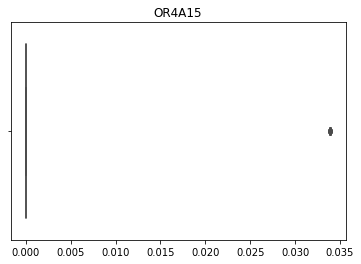

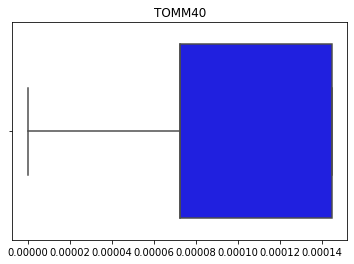

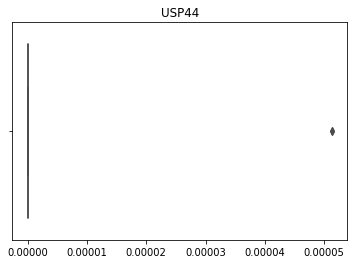

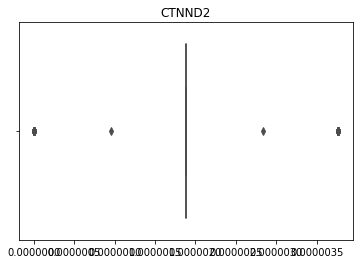

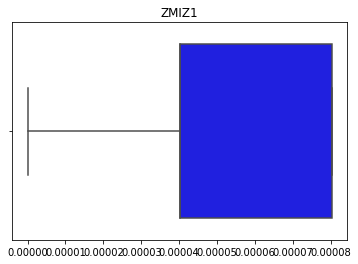

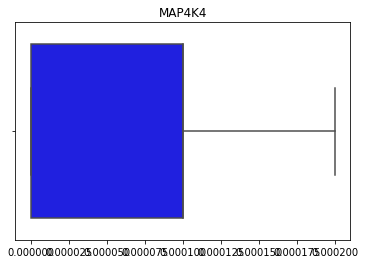

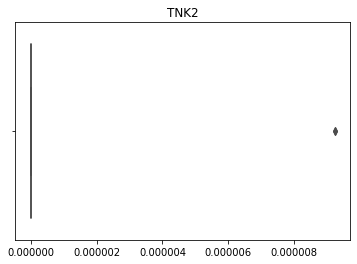

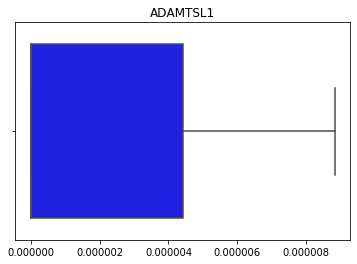

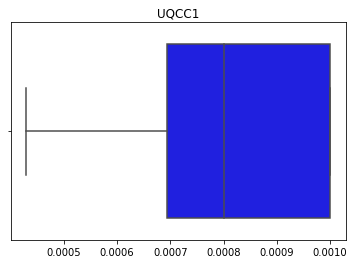

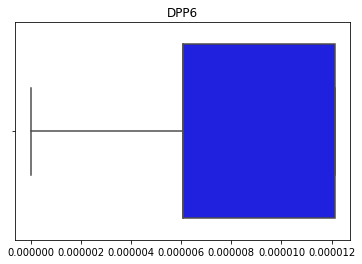

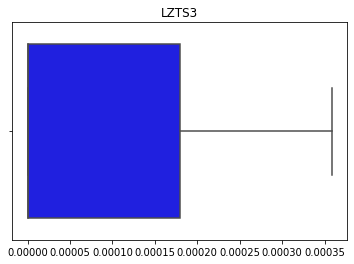

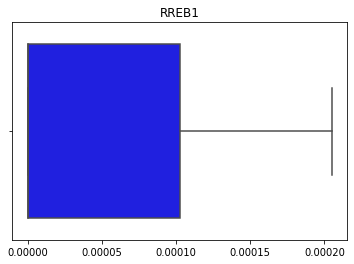

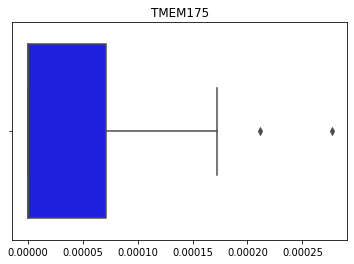

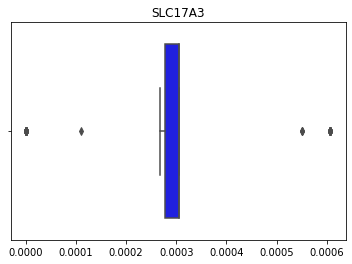

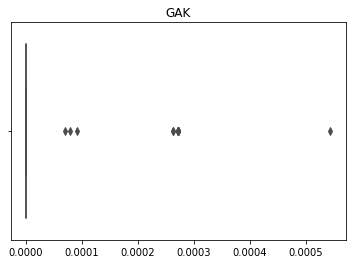

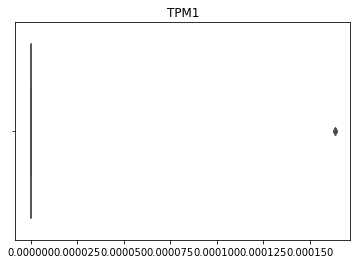

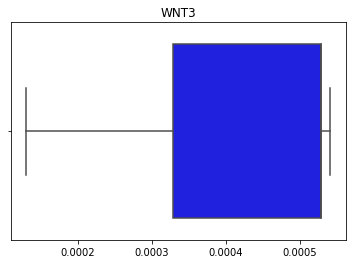

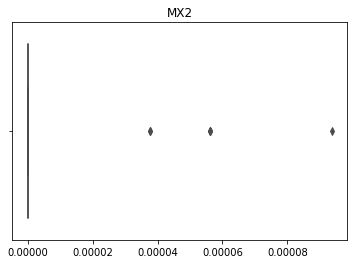

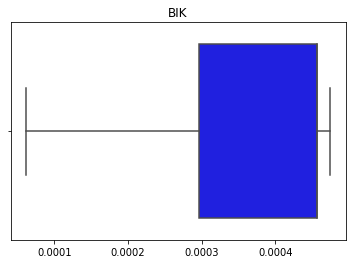

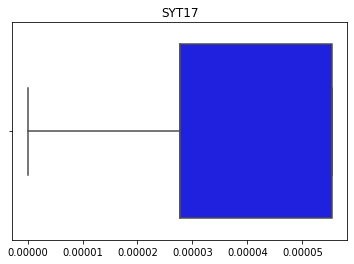

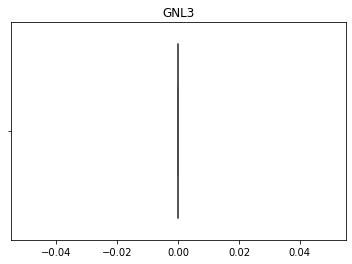

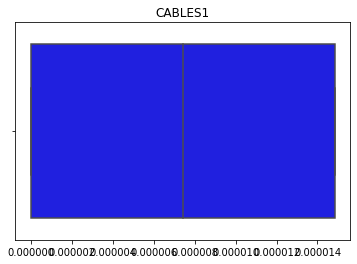

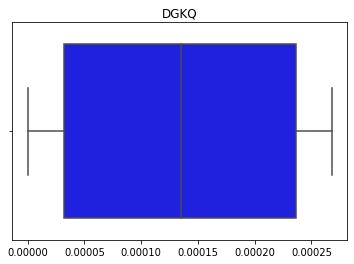

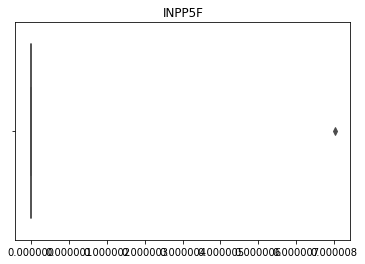

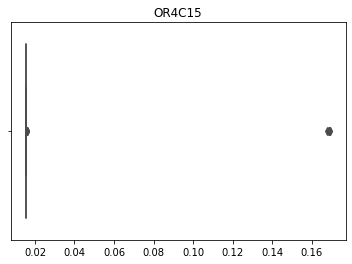

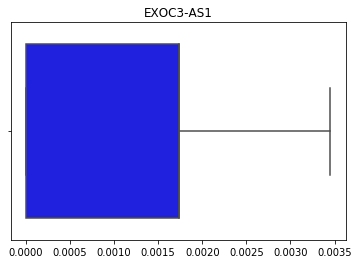

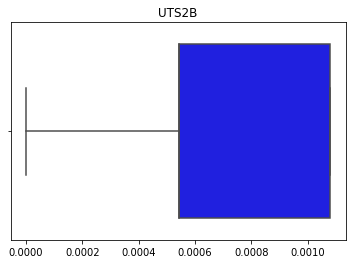

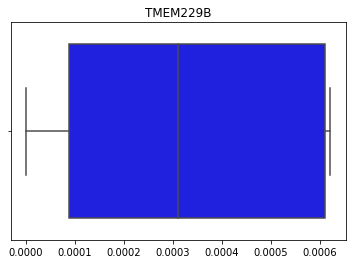

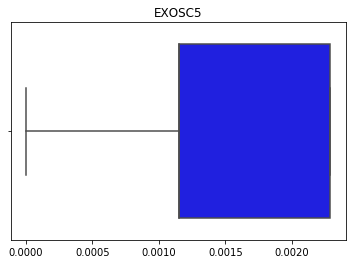

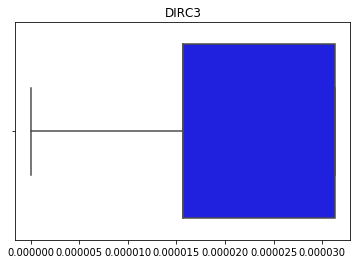

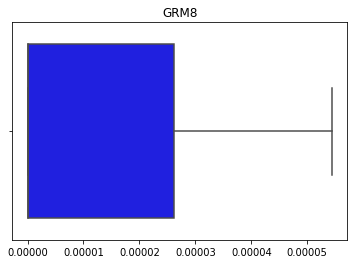

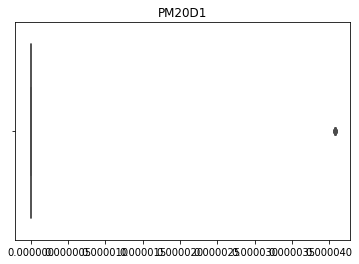

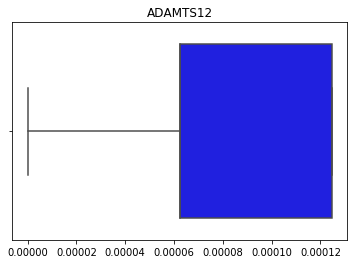

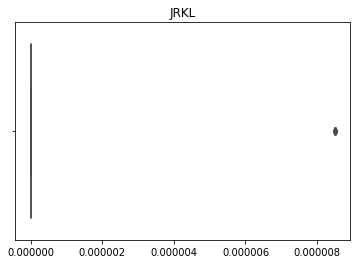

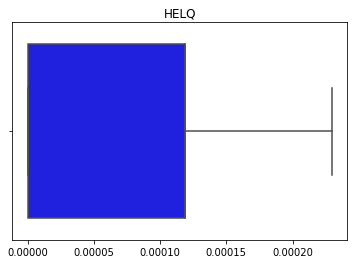

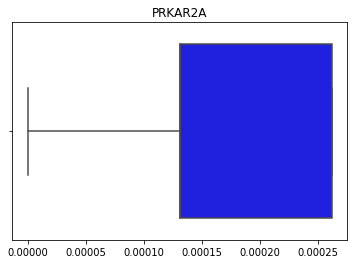

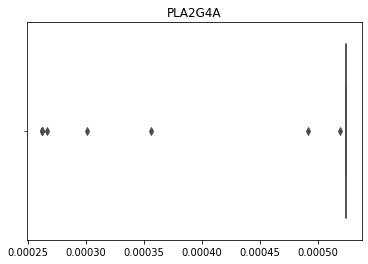

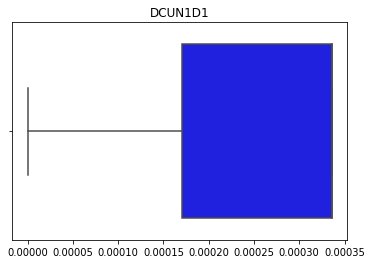

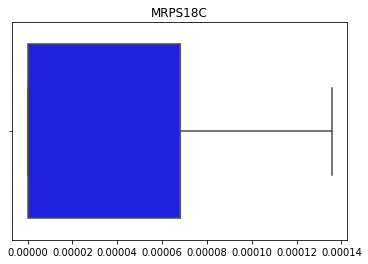

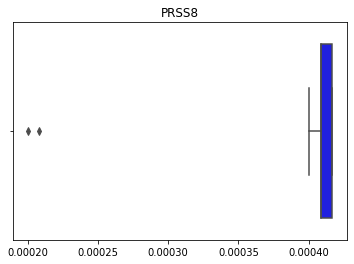

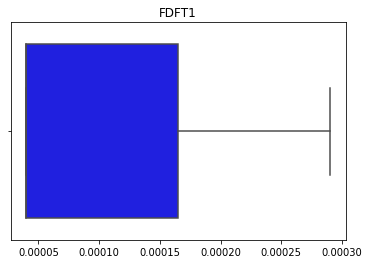

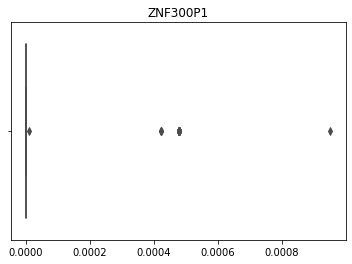

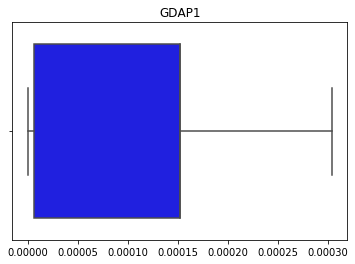

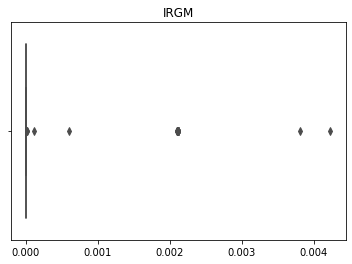

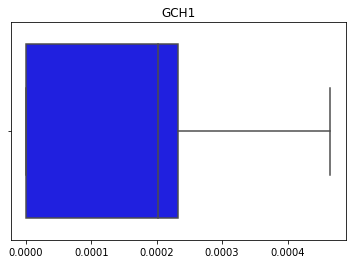

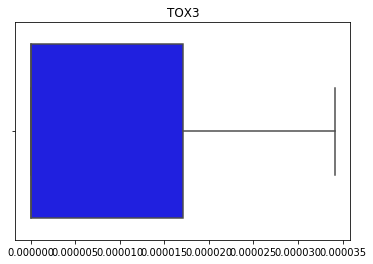

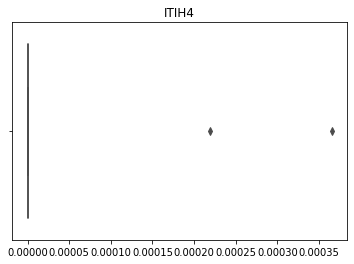

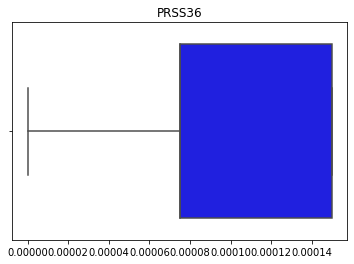

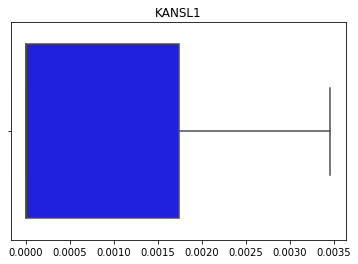

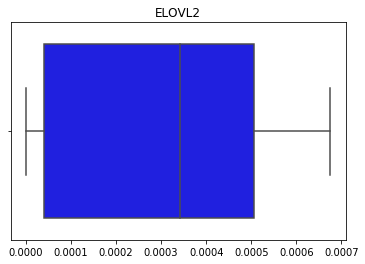

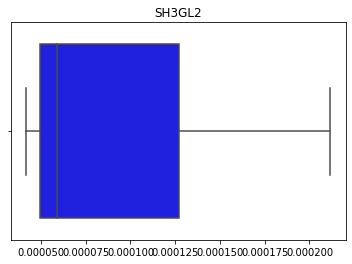

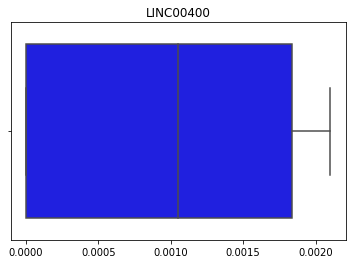

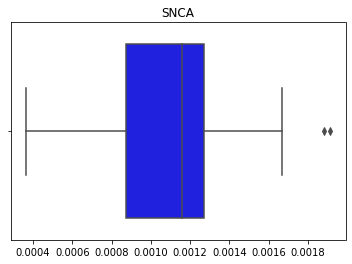

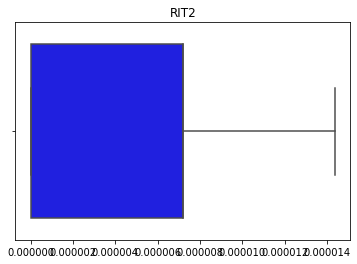

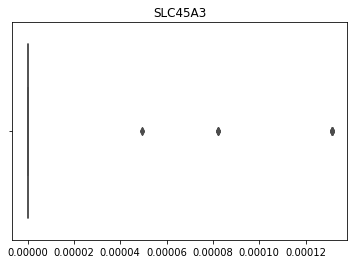

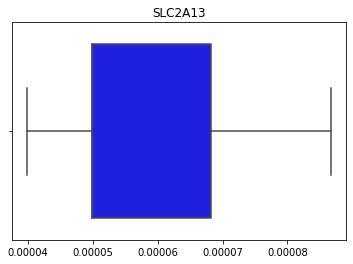

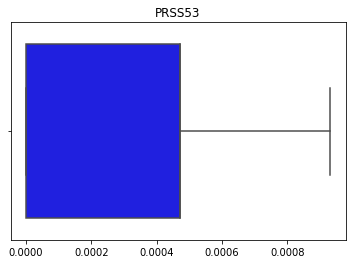

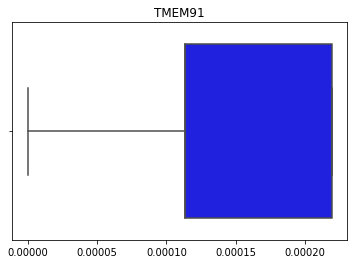

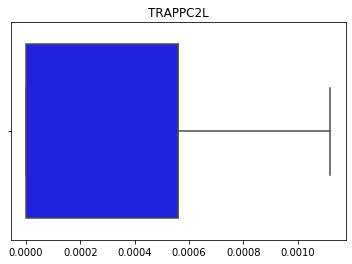

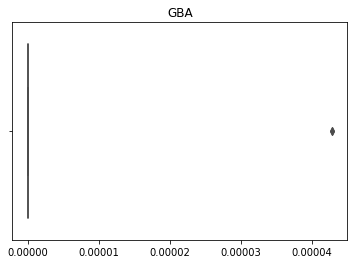

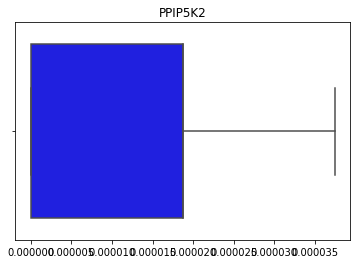

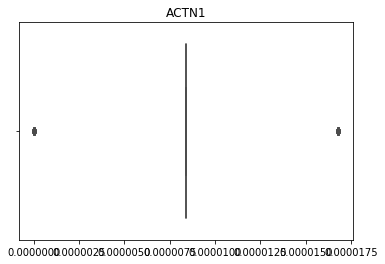

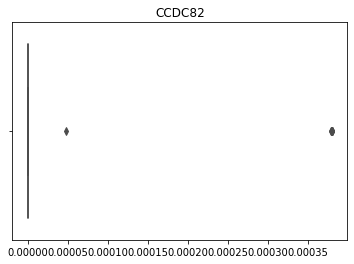

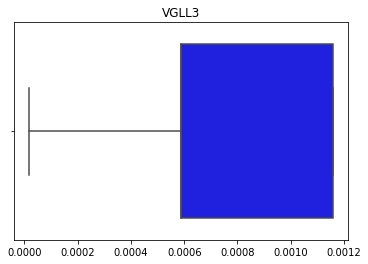

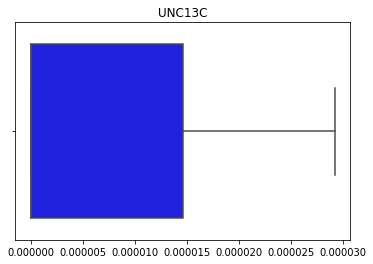

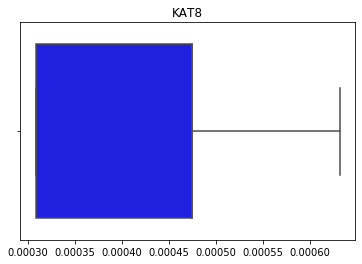

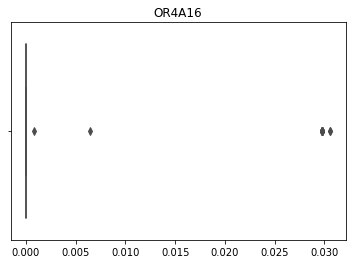

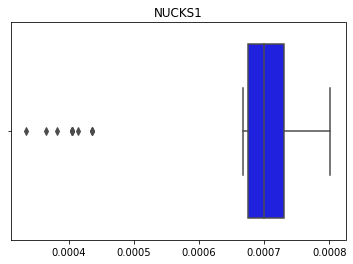

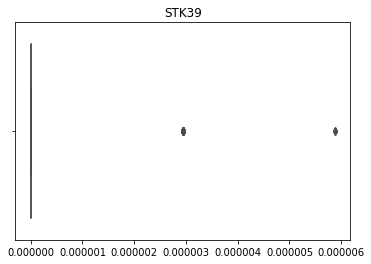

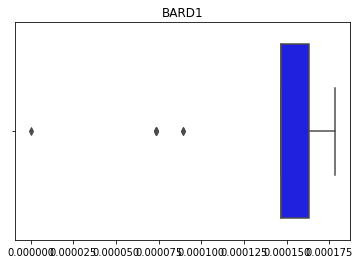

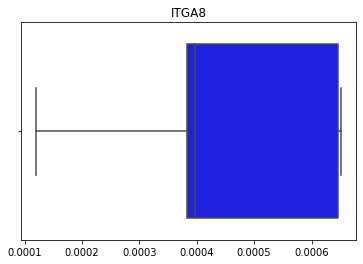

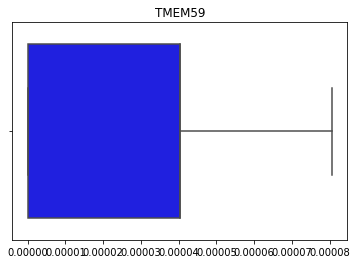

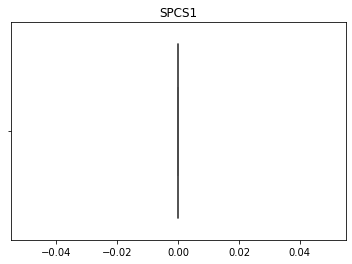

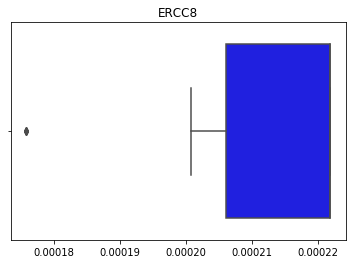

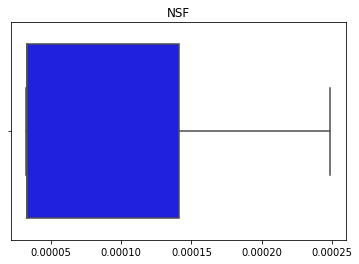

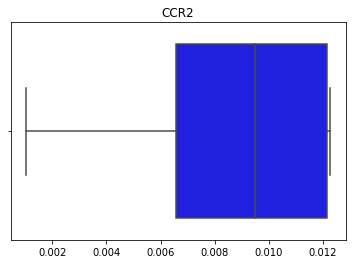

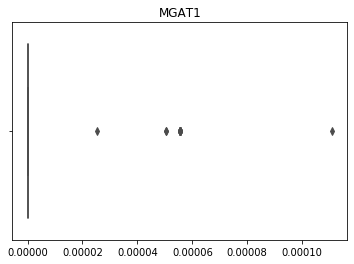

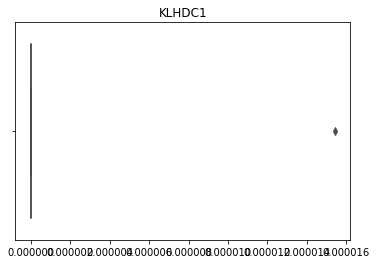

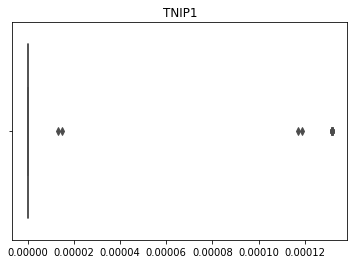

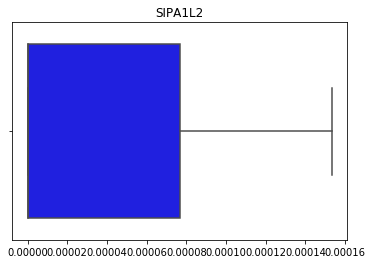

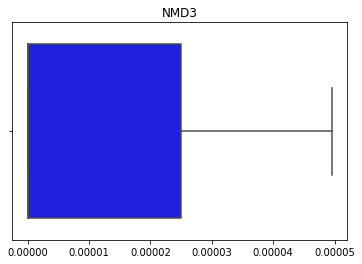

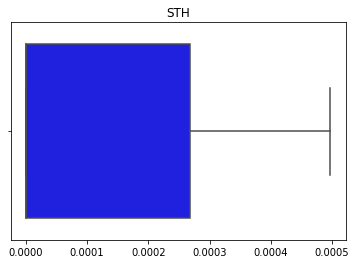

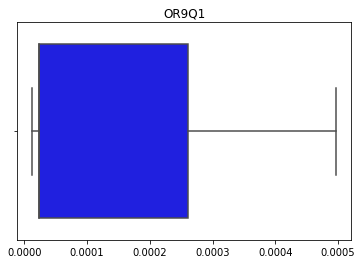

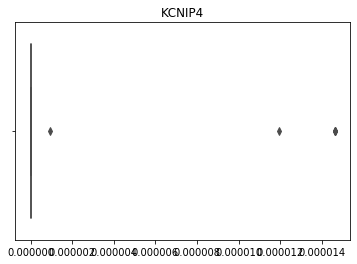

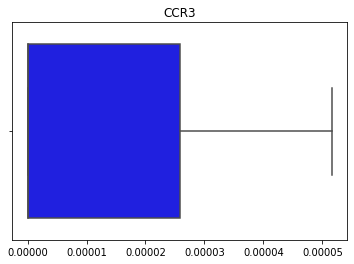

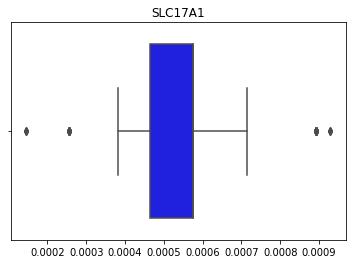

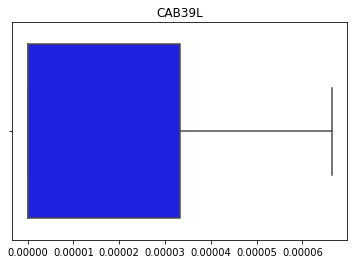

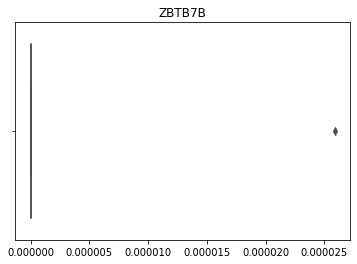

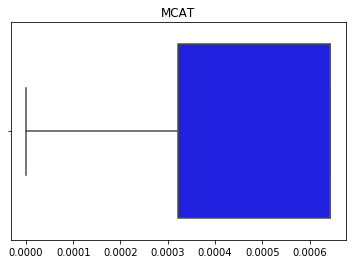

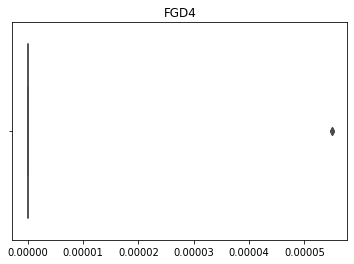

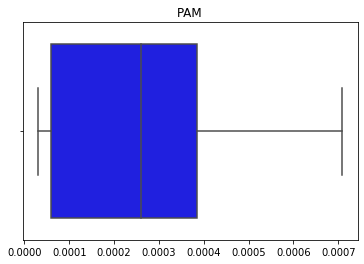

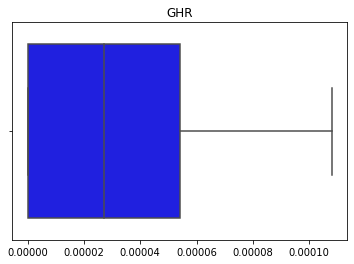

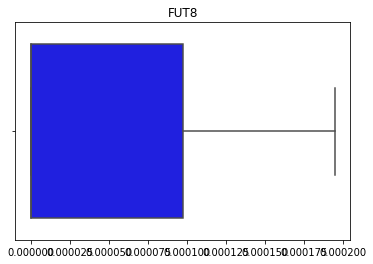

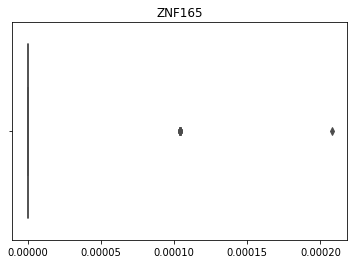

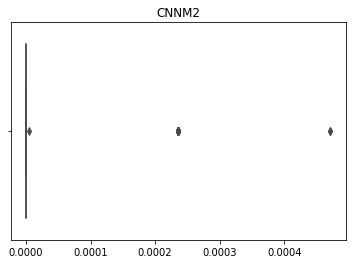

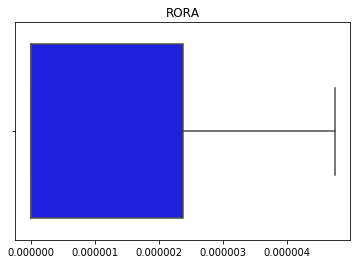

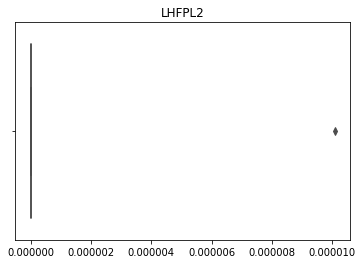

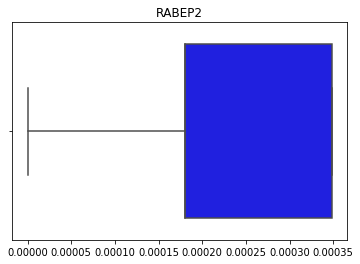

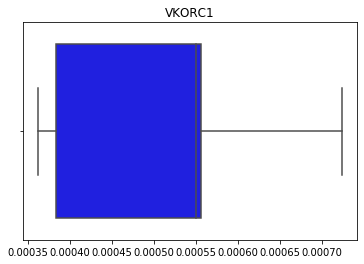

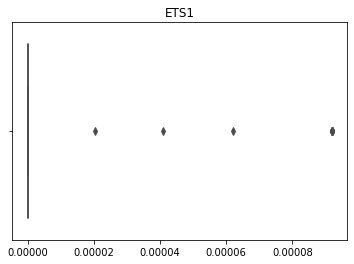

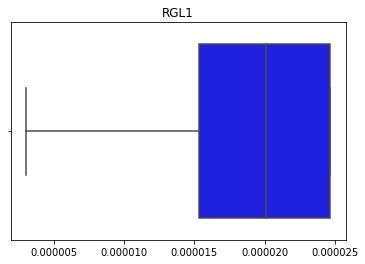

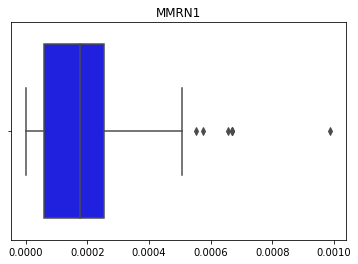

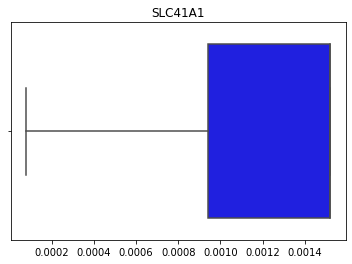

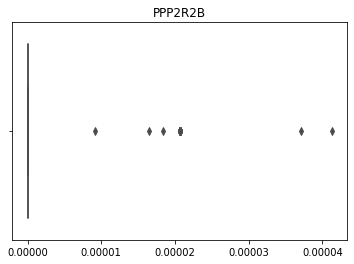

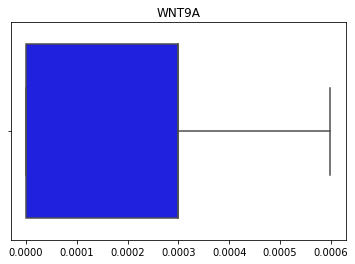

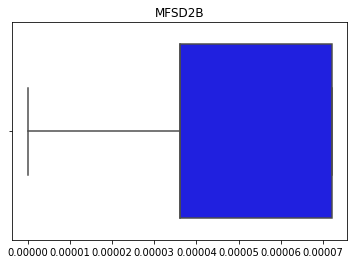

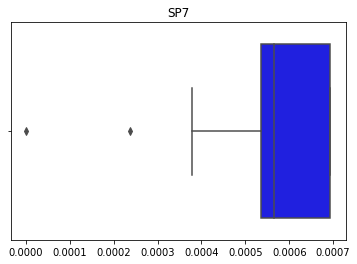

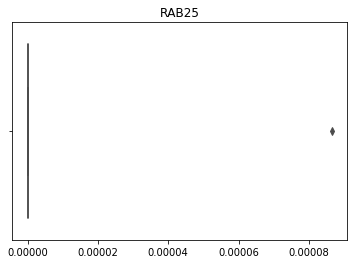

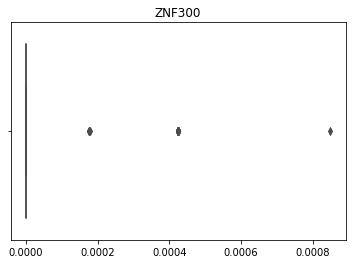

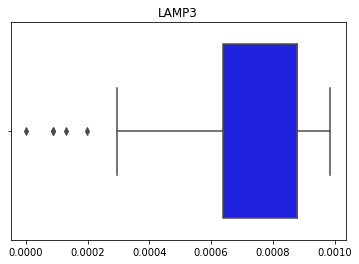

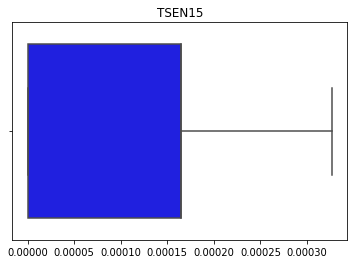

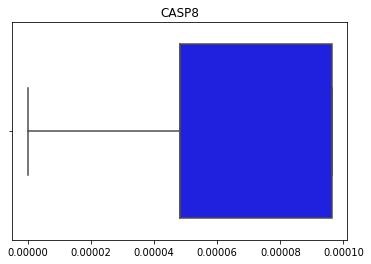

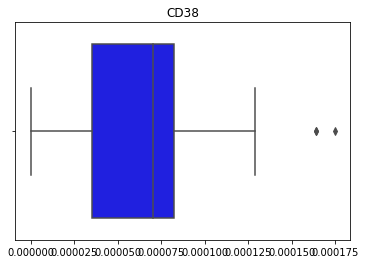

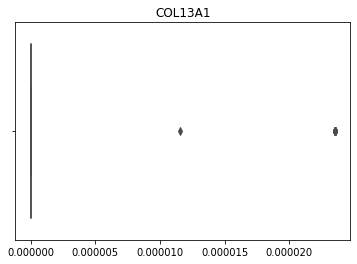

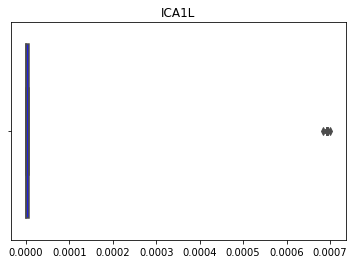

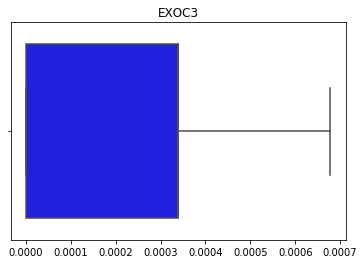

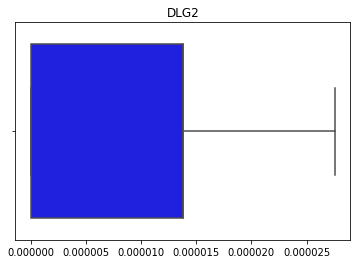

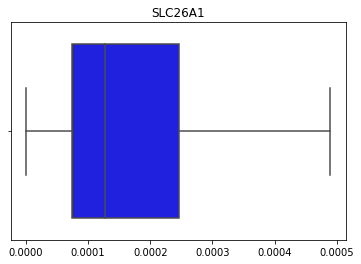

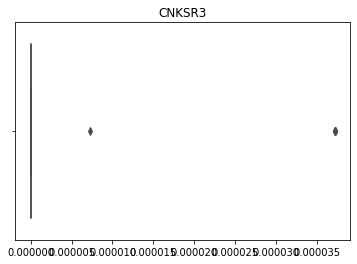

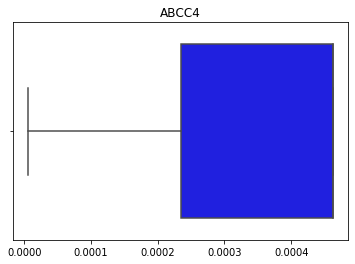

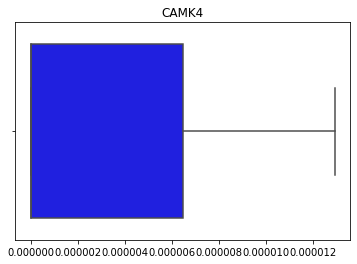

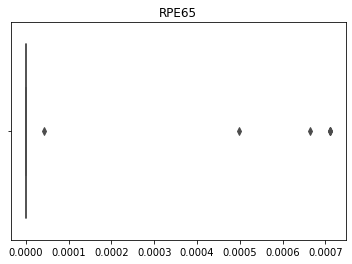

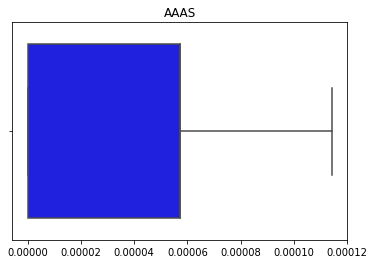

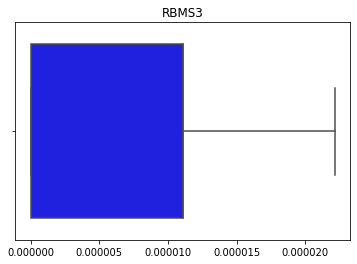

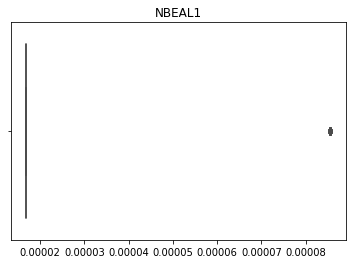

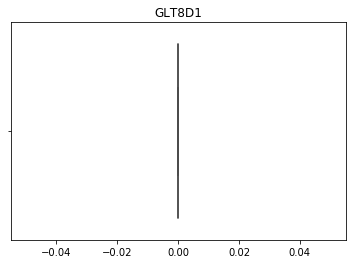

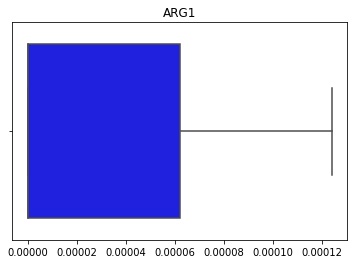

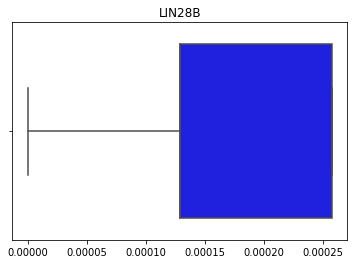

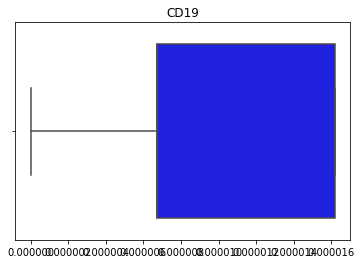

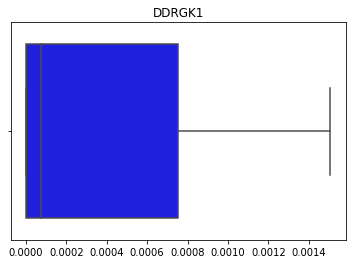

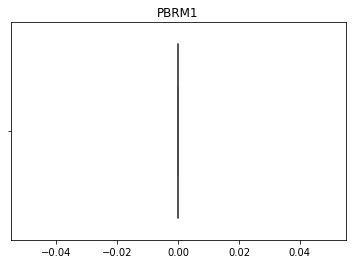

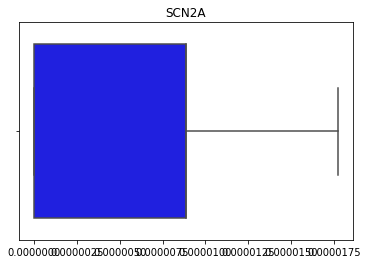

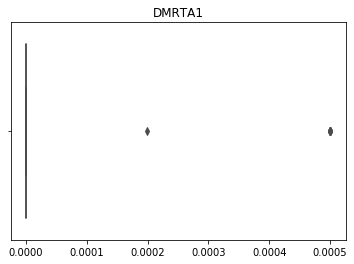

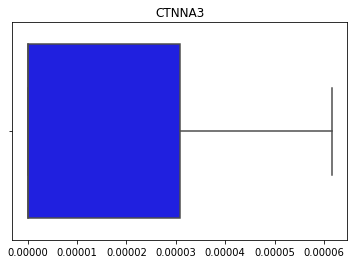

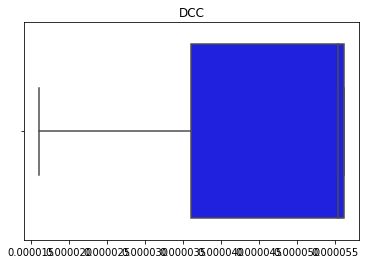

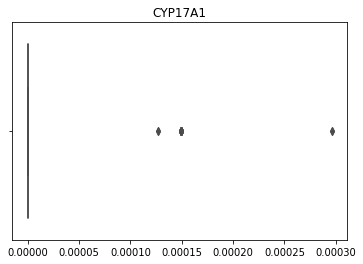

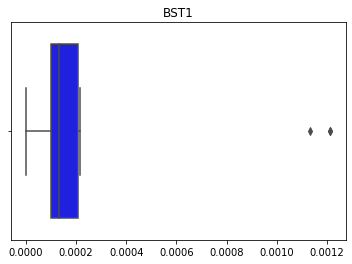

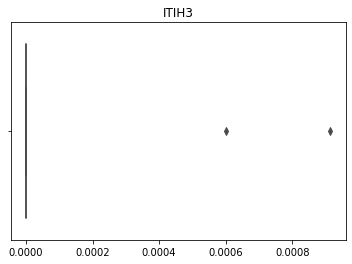

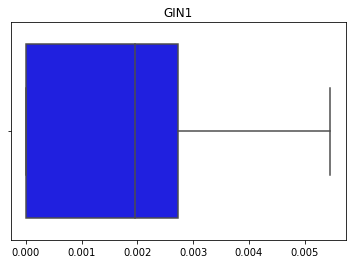

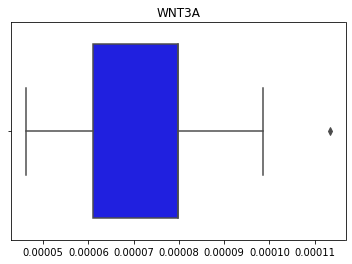

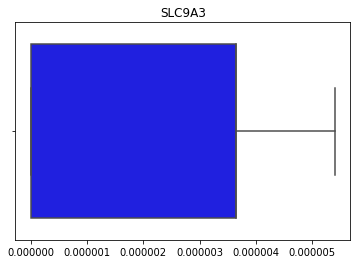

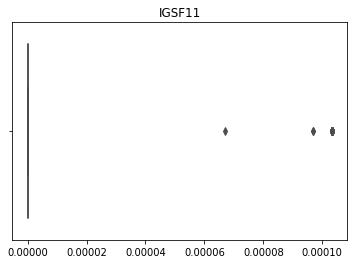

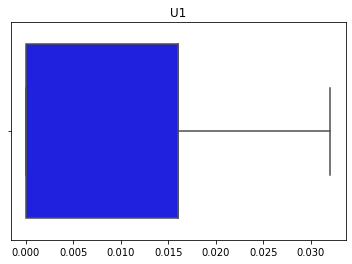

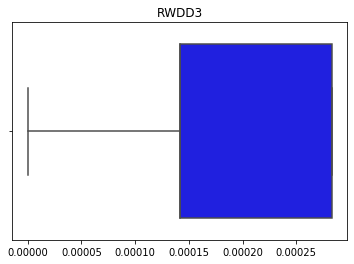

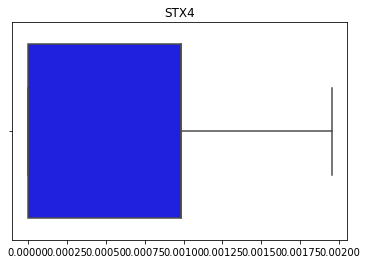

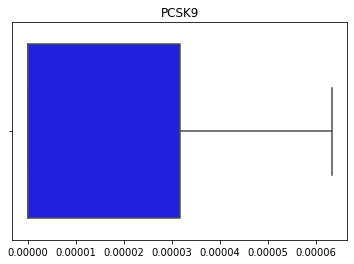

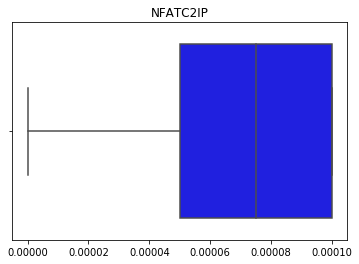

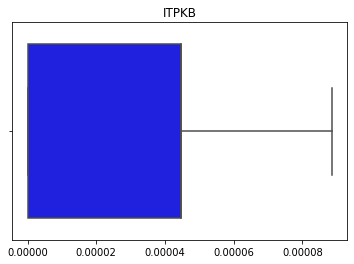

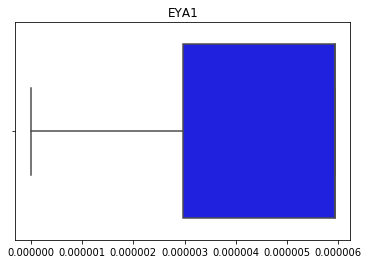

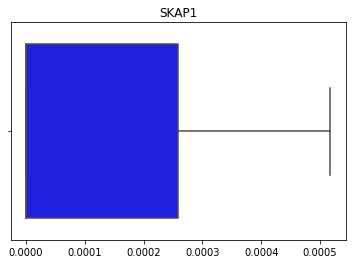

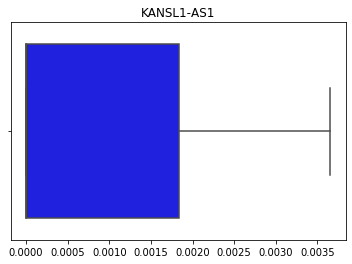

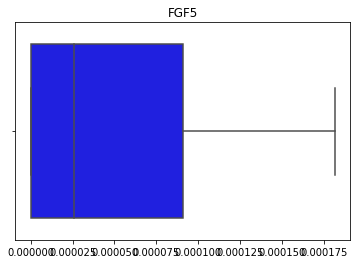

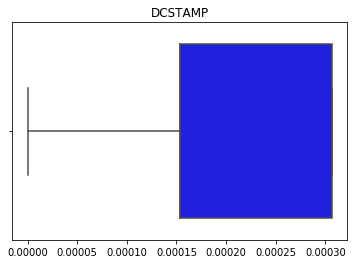

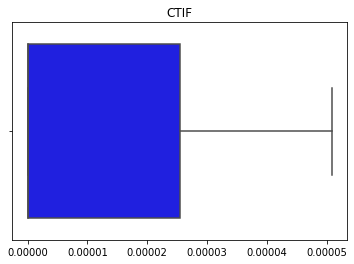

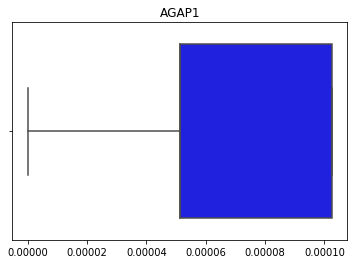

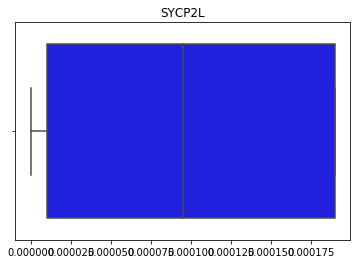

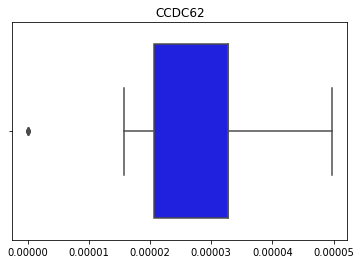

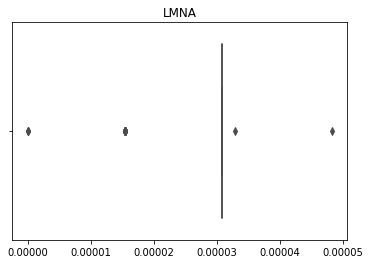

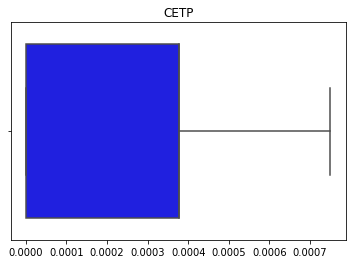

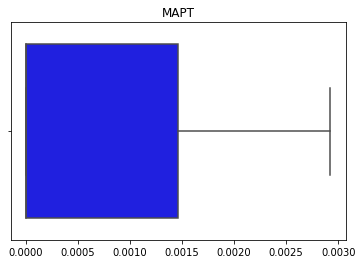

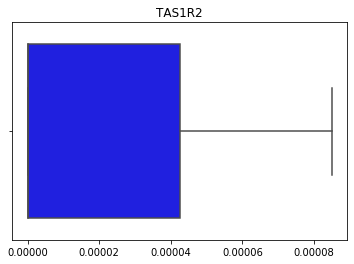

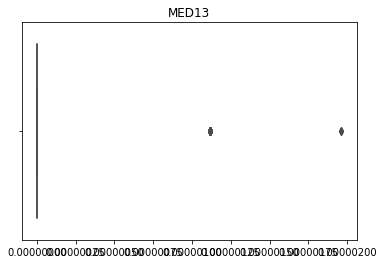

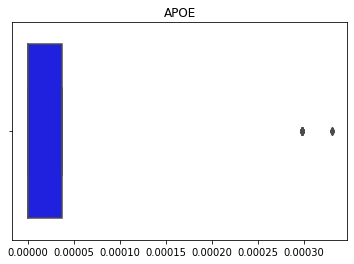

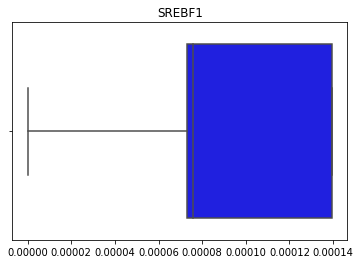

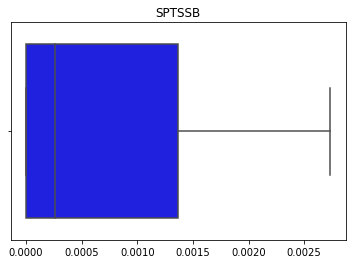

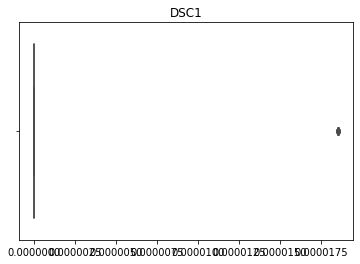

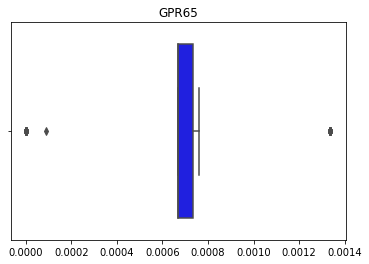

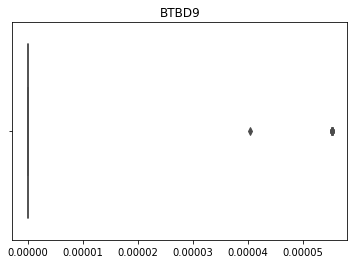

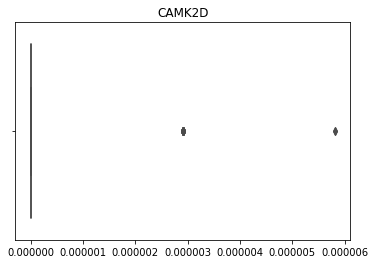

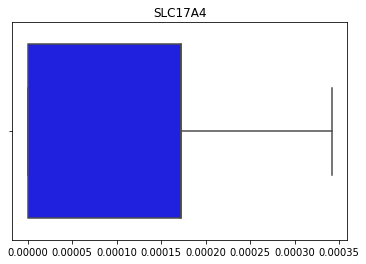

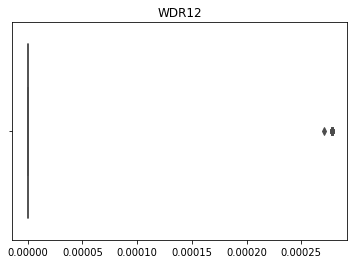

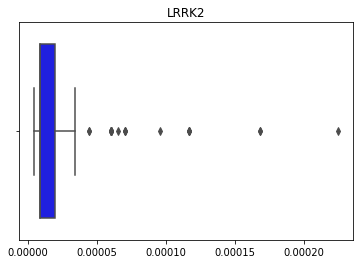

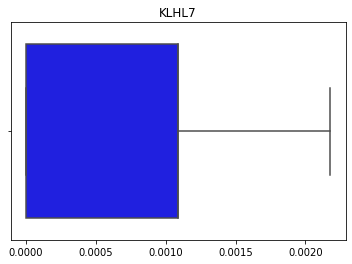

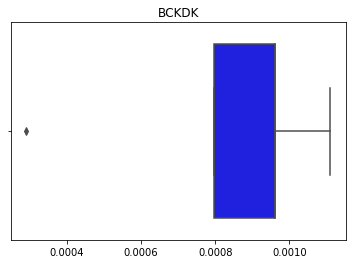

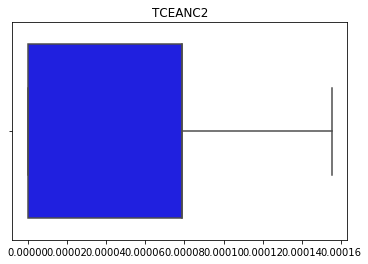

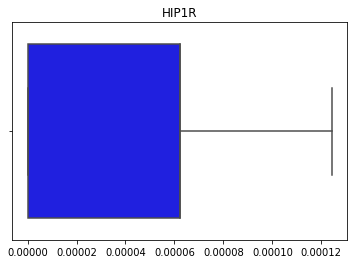

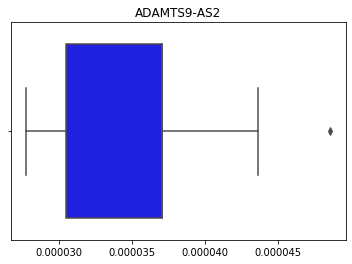

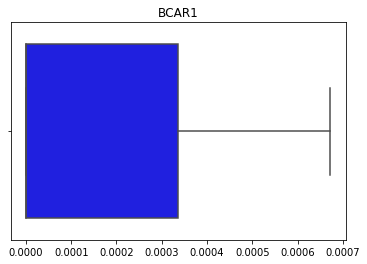

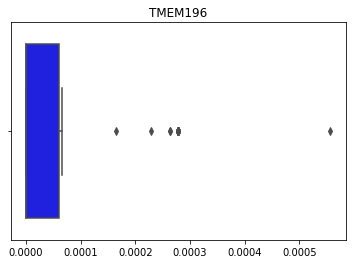

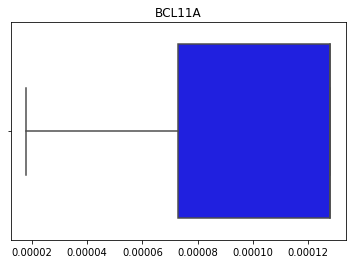

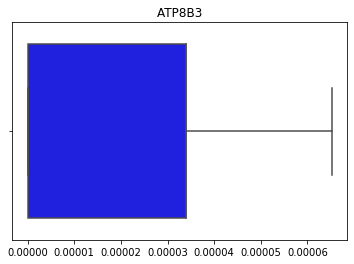

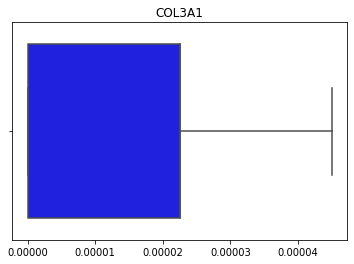

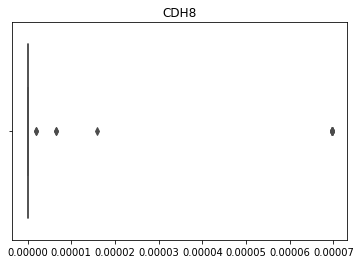

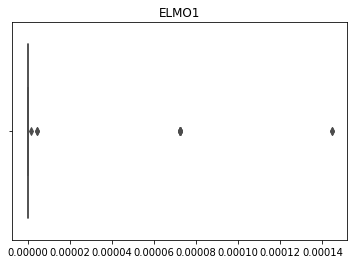

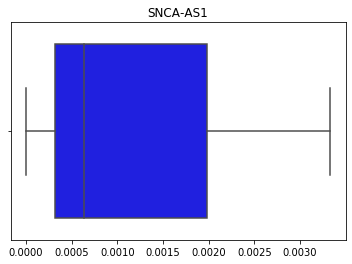

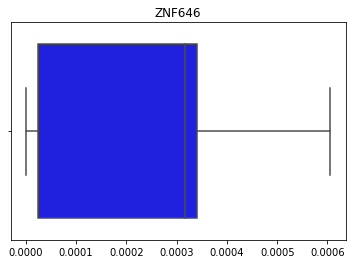

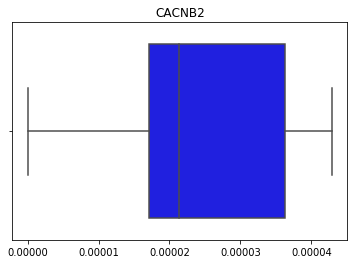

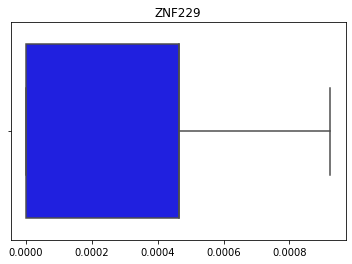

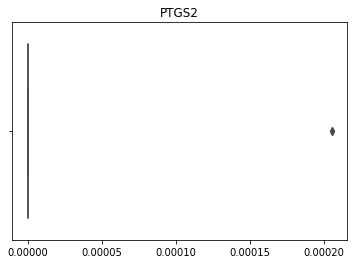

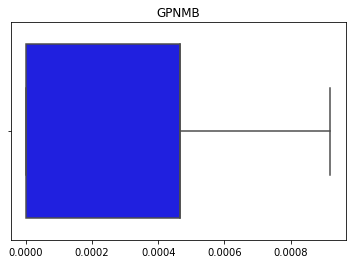

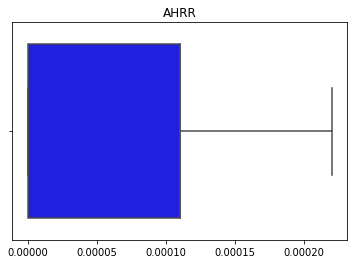

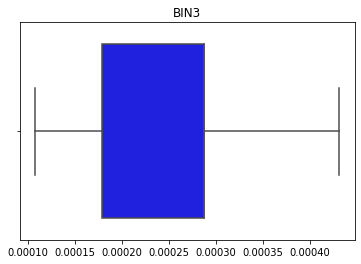

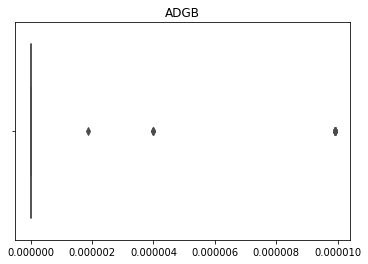

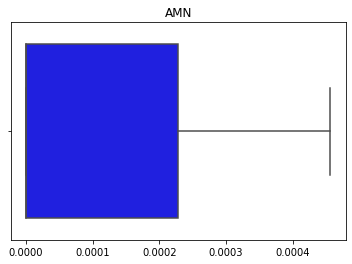

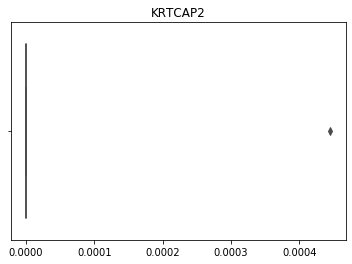

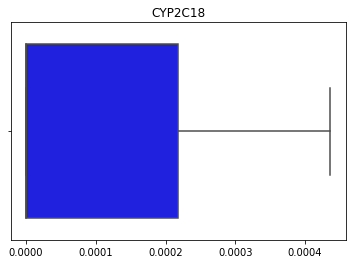

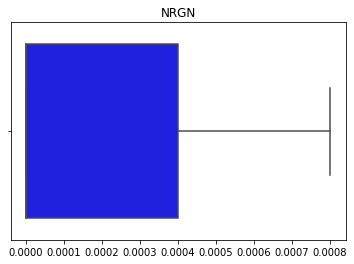

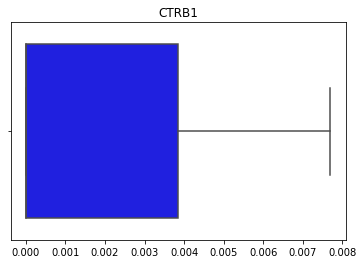

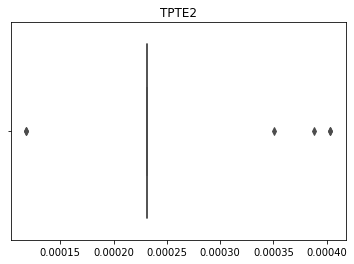

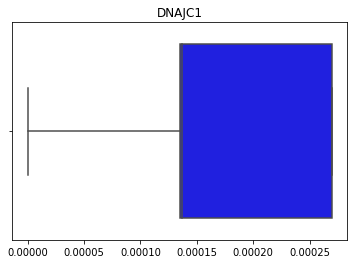

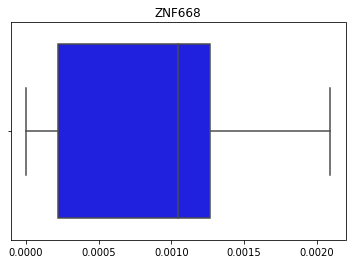

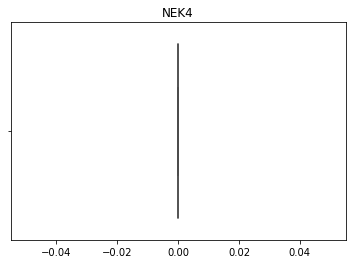

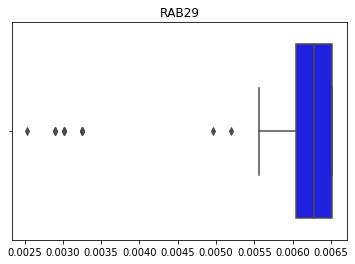

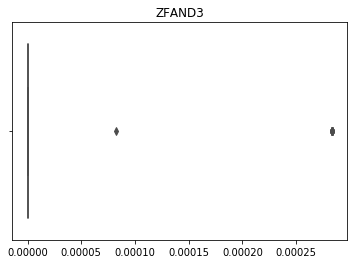

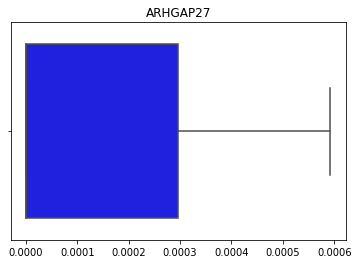

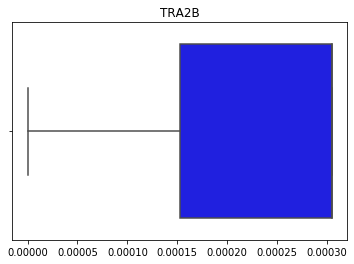

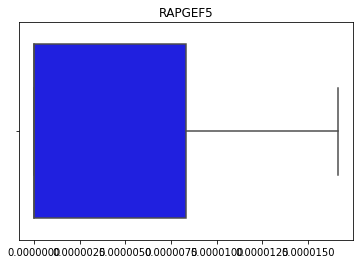

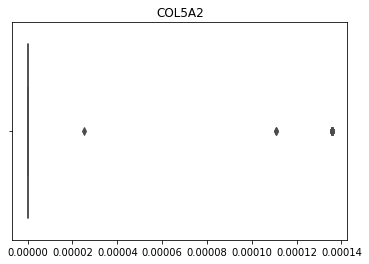

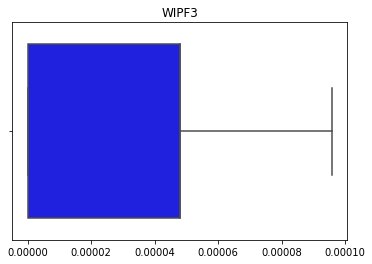

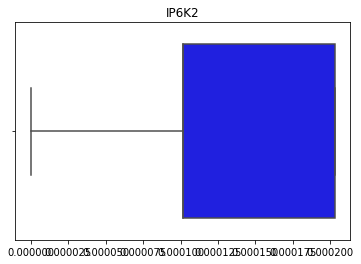

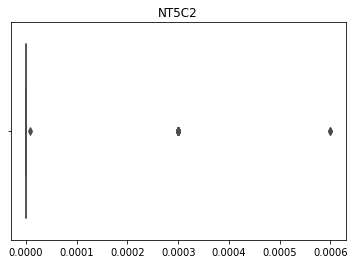

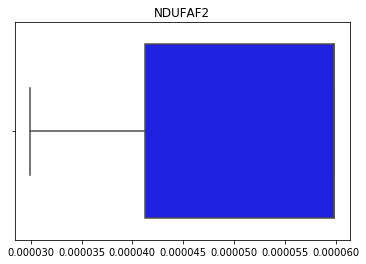

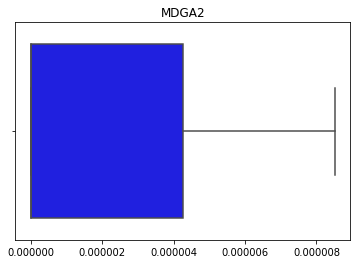

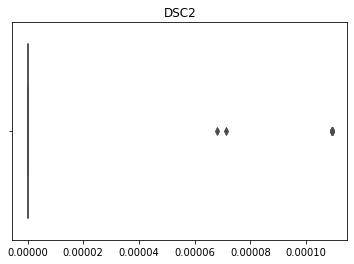

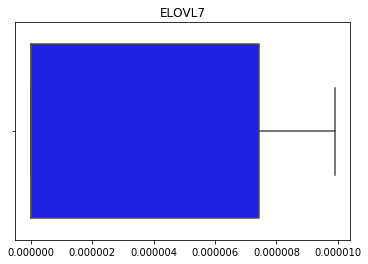

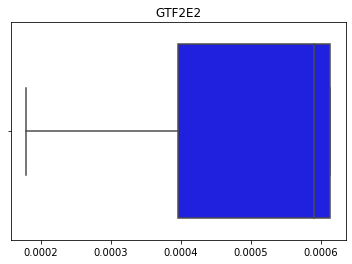

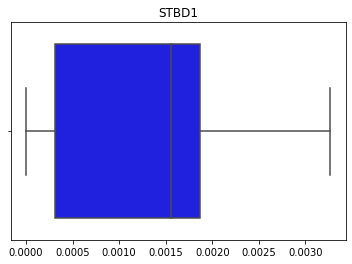

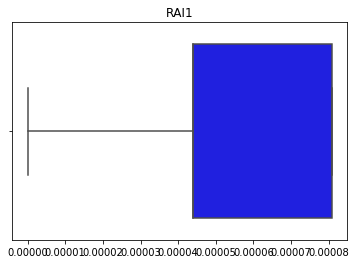

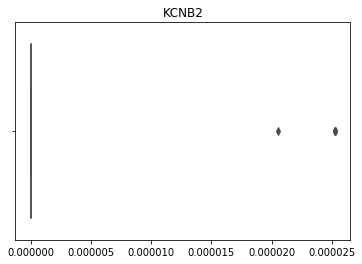

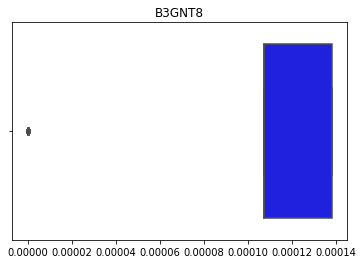

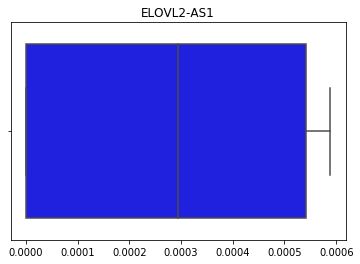

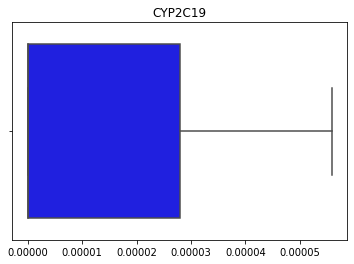

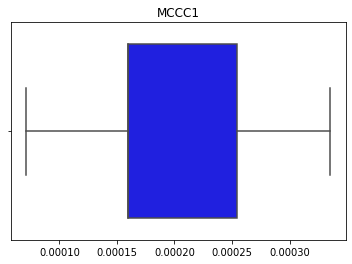

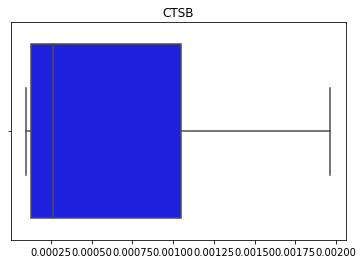

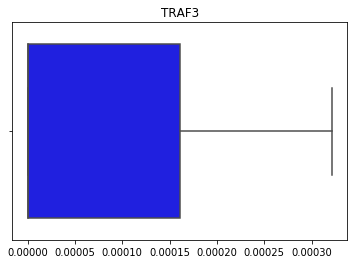

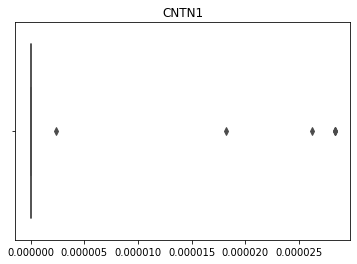

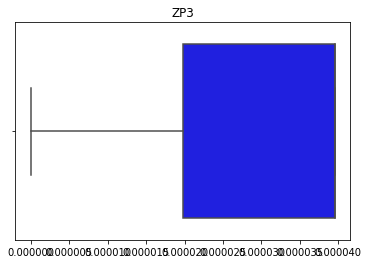

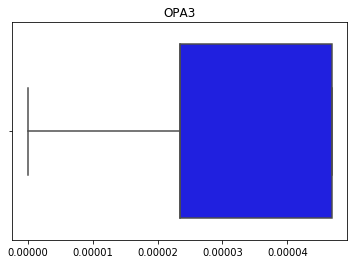

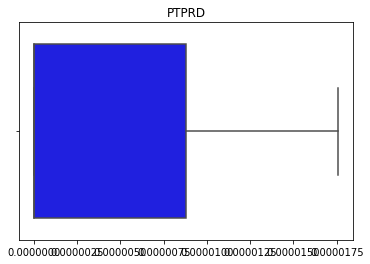

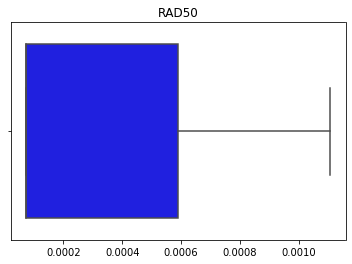

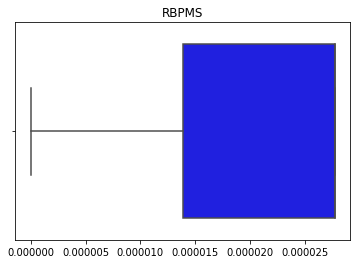

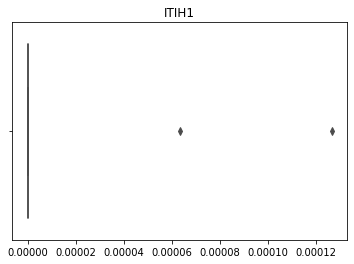

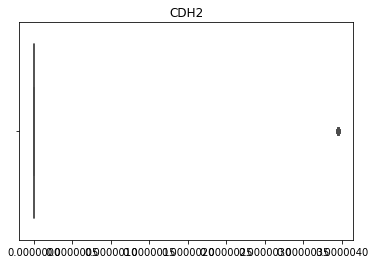

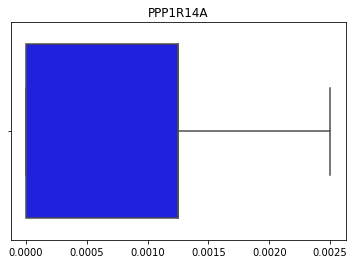

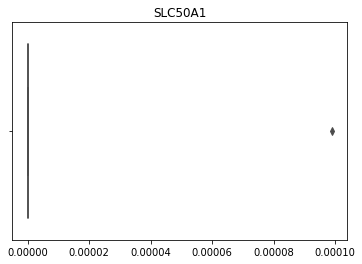

In [12]:
# plot them CADD13
plt.rcParams.update({'figure.max_open_warning': 0})
for gene in CADD13_RawScore_read.columns:
    plt.figure(gene)
    sns.boxplot(CADD13_RawScore_read[[gene]],color="Blue").set_title(gene)

In [14]:
# looks like they show very little variance
# Variance Threshold 
def variance_threshold_selector(data, threshold=0.0):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    print (selector.variances_)
    return data[data.columns[selector.get_support(indices=True)]]

In [15]:
variance_threshold_selector(CADD13_RawScore_read)

[1.39826601e-04 2.44582883e-09 4.87534818e-11 1.65686533e-12
 8.91045924e-10 4.51613436e-09 1.57967458e-12 5.68188192e-12
 2.41898846e-08 1.44506083e-11 1.27566056e-08 3.74597124e-09
 3.28914480e-09 3.94254839e-08 9.82137121e-09 4.96389468e-10
 1.18863750e-08 1.88312114e-10 8.38806516e-09 3.68257838e-10
 0.00000000e+00 3.01772824e-11 9.04895862e-09 6.01035404e-13
 2.85170375e-03 1.41091274e-06 1.40718497e-07 5.15542955e-08
 6.99049050e-07 1.06045845e-10 1.91750133e-10 1.42208878e-10
 1.65768696e-09 5.61761133e-12 6.04296741e-09 8.70536986e-09
 3.13865170e-09 8.25203349e-09 2.25550644e-09 8.18023502e-10
 4.69748577e-09 4.18390414e-08 1.03539274e-08 8.96743930e-07
 2.20000889e-08 1.21734137e-10 1.68320976e-09 2.47091141e-09
 9.60081172e-07 5.83383881e-08 2.71774129e-09 5.72945793e-07
 9.19554778e-08 1.86311995e-11 1.40863771e-09 1.58451410e-10
 1.03479105e-07 6.38014501e-09 1.58090839e-07 3.39500815e-11
 1.43660659e-10 3.25670442e-11 1.12003253e-08 1.65984893e-07
 5.19270751e-11 1.178420

OR4A15    TOMM40     USP44        CTNND2     ZMIZ1    MAP4K4  \
Sample                                                                    
AET0044  0.000000  0.000072  0.000000  1.883807e-06  0.000080  0.000000   
AET0380  0.000000  0.000145  0.000051  3.767611e-06  0.000040  0.000100   
AET0027  0.000000  0.000072  0.000000  1.883807e-06  0.000040  0.000000   
AET0049  0.000000  0.000145  0.000000  1.883807e-06  0.000080  0.000000   
AET0006  0.000000  0.000000  0.000000  0.000000e+00  0.000040  0.000169   
AET0065  0.000000  0.000145  0.000000  3.767611e-06  0.000080  0.000200   
AET0374  0.000000  0.000145  0.000000  1.883807e-06  0.000080  0.000000   
AET0002  0.000000  0.000072  0.000000  1.883807e-06  0.000080  0.000200   
AET0110  0.000000  0.000145  0.000000  0.000000e+00  0.000040  0.000100   
AET0372  0.000000  0.000072  0.000000  3.767611e-06  0.000000  0.000000   
AET0036  0.000000  0.000145  0.000000  1.883807e-06  0.000040  0.000100   
AET0004  0.000000  0.000000  0.000000  0.000000e+00  0.000040  0.000100   
AET0070  0.000000  0.000072  0.000000  3.767611e-06  0.000080  0.000000   
AET0031  0.033926  0.000145  0.000000  1.883807e-06  0.000080  0.000200   
AET0076  0.000000  0.000145  0.000000  3.767611e-06  0.000080  0.000000   
AET0078  0.000000  0.000145  0.000051  1.883807e-06  0.000040  0.000100   
AET0068  0.000000  0.000145  0.000000  1.883807e-06  0.000000  0.000100   
AET0056  0.000000  0.000072  0.000000  2.841496e-06  0.000080  0.000100   
AET0055  0.000000  0.000145  0.000000  3.767611e-06  0.000040  0.000100   
AET0404  0.000000  0.000072  0.000000  0.000000e+00  0.000080  0.000000   
AET0073  0.000000  0.000145  0.000000  9.576906e-07  0.000080  0.000000   
AET0075  0.033926  0.000072  0.000000  0.000000e+00  0.000040  0.000000   
AET0085  0.000000  0.000072  0.000000  3.767611e-06  0.000000  0.000100   
AET0041  0.033926  0.000072  0.000000  1.883807e-06  0.000000  0.000000   
AET0025  0.000000  0.000072  0.000000  1.883807e-06  0.000040  0.000100   
AET0099  0.000000  0.000072  0.000000  0.000000e+00  0.000040  0.000100   
AET0377  0.000000  0.000145  0.000000  3.767611e-06  0.000000  0.000200   
AET0045  0.033926  0.000145  0.000000  3.767611e-06  0.000080  0.000100   
AET0080  0.000000  0.000072  0.000000  0.000000e+00  0.000080  0.000100   
AET0097  0.000000  0.000145  0.000000  1.883807e-06  0.000073  0.000000   
AET0090  0.000000  0.000072  0.000000  3.767611e-06  0.000080  0.000000   
AET0001  0.000000  0.000072  0.000000  1.883807e-06  0.000040  0.000000   
AET0066  0.000000  0.000145  0.000000  0.000000e+00  0.000040  0.000100   
AET0062  0.000000  0.000072  0.000000  3.767611e-06  0.000000  0.000000   
AET0052  0.000000  0.000000  0.000000  1.883807e-06  0.000000  0.000200   
AET0087  0.000000  0.000145  0.000000  0.000000e+00  0.000040  0.000100   
AET0022  0.000000  0.000145  0.000000  1.883807e-06  0.000040  0.000100   
AET0121  0.000000  0.000000  0.000000  3.767611e-06  0.000080  0.000100   
AET0039  0.000000  0.000072  0.000000  0.000000e+00  0.000080  0.000100   
AET0415  0.000000  0.000072  0.000000  3.767611e-06  0.000000  0.000000   
AET0046  0.000000  0.000072  0.000000  1.883807e-06  0.000000  0.000000   
AET0048  0.000000  0.000072  0.000000  1.883807e-06  0.000080  0.000000   
AET0051  0.000000  0.000000  0.000000  1.883807e-06  0.000080  0.000100   
AET0034  0.033926  0.000145  0.000000  1.883807e-06  0.000040  0.000200   
AET0016  0.033926  0.000072  0.000000  1.883807e-06  0.000040  0.000200   
AET0077  0.000000  0.000072  0.000000  1.883807e-06  0.000080  0.000200   
AET0015  0.033926  0.000145  0.000000  1.883807e-06  0.000080  0.000100   
AET0032  0.000000  0.000072  0.000000  1.883807e-06  0.000040  0.000100   
AET0418  0.000000  0.000072  0.000000  1.883807e-06  0.000080  0.000100   
AET0104  0.000000  0.000145  0.000000  0.000000e+00  0.000080  0.000000   
AET0397  0.000000  0.000072  0.000000  0.000000e+00  0.000000  0.000000   
AET0137  0.000000  0.000072  0.00000